<a href="https://colab.research.google.com/github/Friendlysiva143/Customer_segmentation/blob/main/Market_Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [326]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_Original=pd.read_excel("/content/drive/MyDrive/marketing_campaign.xlsx",sheet_name="marketing_campaign",parse_dates=['Dt_Customer'])

In [5]:
df=pd.read_excel("/content/drive/MyDrive/marketing_campaign.xlsx",sheet_name="marketing_campaign",parse_dates=['Dt_Customer'])

In [6]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [7]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [8]:
df.shape

(2240, 29)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    23.750000     1.000000   
50%              2013-07-08 12:00:00    49.000000   173.500000     8.000000   
75%              2013-12-30 06:00:00    74.000000   504.250000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.962453   336.597393    39.773434   

       MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean        166.950000  ...           5.316518      0.072768      0.074554   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%          16.000000  ...           3.000000      0.000000      0.000000   
50%          67.000000  ...           6.000000      0.000000      0.000000   
75%         232.000000  ...           7.000000      0.000000      0.000000   
max        1725.000000  ...          20.000000      1.000000      1.000000   
std         225.715373  ...           2.426645      0.259813      0.262728   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  
std          0.0     0.356274  

[8 rows x 27 columns]

In [11]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
Response                        int64
dtype: object

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.columns.duplicated().sum()

np.int64(0)

In [15]:
df.corr(numeric_only=True)

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.037166   -0.060846 -0.083101  0.221798  0.387741   
NumWebPurchases     -0.018924   -0.145040  0.387878 -0.361647  0.155500   
NumCatalogPurchases -0.003440   -0.121275  0.589162 -0.502237 -0.110769   
NumStorePurchases   -0.014927   -0.128272  0.529362 -0.499683  0.050695   
NumWebVisitsMonth   -0.007446    0.121139 -0.553088  0.447846  0.134884   
AcceptedCmp3        -0.036040    0.061774 -0.016174  0.014674 -0.042677   
AcceptedCmp4        -0.025387   -0.060510  0.184400 -0.161600  0.038886   
AcceptedCmp5        -0.007517    0.007123  0.335943 -0.205634 -0.191050   
AcceptedCmp1        -0.021614   -0.005930  0.276820 -0.172339 -0.140090   
AcceptedCmp2        -0.015061   -0.006539  0.087545 -0.081716 -0.015605   
Complain             0.033883   -0.030128 -0.027225  0.040207  0.003138   
Z_CostContact             NaN         NaN       NaN       NaN       NaN   
Z_Revenue                 NaN         NaN       NaN       NaN       NaN   
Response            -0.021968    0.021325  0.133047 -0.080008 -0.154446   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.046524 -0.022878   0.004600        -0.004437   
Year_Birth          -0.019871 -0.157773  -0.017917        -0.030872   
Income              -0.003970  0.578650   0.430842         0.584633   
Kidhome              0.008827 -0.496297  -0.372581        -0.437129   
Teenhome             0.016198  0.004846  -0.176764        -0.261160   
Recency              1.000000  0.016064  -0.004306         0.023056   
MntWines             0.016064  1.000000   0.389637         0.562667   
MntFruits           -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts      0.023056  0.562667   0.543105         1.000000   
MntFishProducts      0.001079  0.399753   0.594804         0.568402   
MntSweetProducts     0.022670  0.386581   0.567164         0.523846   
MntGoldProds         0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases   -0.001098  0.010940  -0.132114        -0.122415   
NumWebPurchases     -0.010726  0.542265   0.296735         0.293761   
NumCatalogPurchases  0.025110  0.635226   0.487917         0.723827   
NumStorePurchases    0.000799  0.642100   0.461758         0.479659   
NumWebVisitsMonth   -0.021445 -0.320653  -0.418383        -0.539470   
AcceptedCmp3        -0.032991  0.062202   0.014727         0.018272   
AcceptedCmp4         0.018826  0.373286   0.010152         0.102912   
AcceptedCmp5         0.000129  0.472613   0.215833         0.373769   
AcceptedCmp1        -0.019283  0.354133   0.194748         0.309761   
AcceptedCmp2        -0.001781  0.205907  -0.009773         0.043033   
Complain             0.013231 -0.039007  -0.005166        -0.023483   
Z_CostContact             NaN       NaN        NaN              NaN   
Z_Revenue                 NaN       NaN        NaN              NaN   
Response            -0.198437  0.247254   0.125289         0.236335   

                     MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
ID   

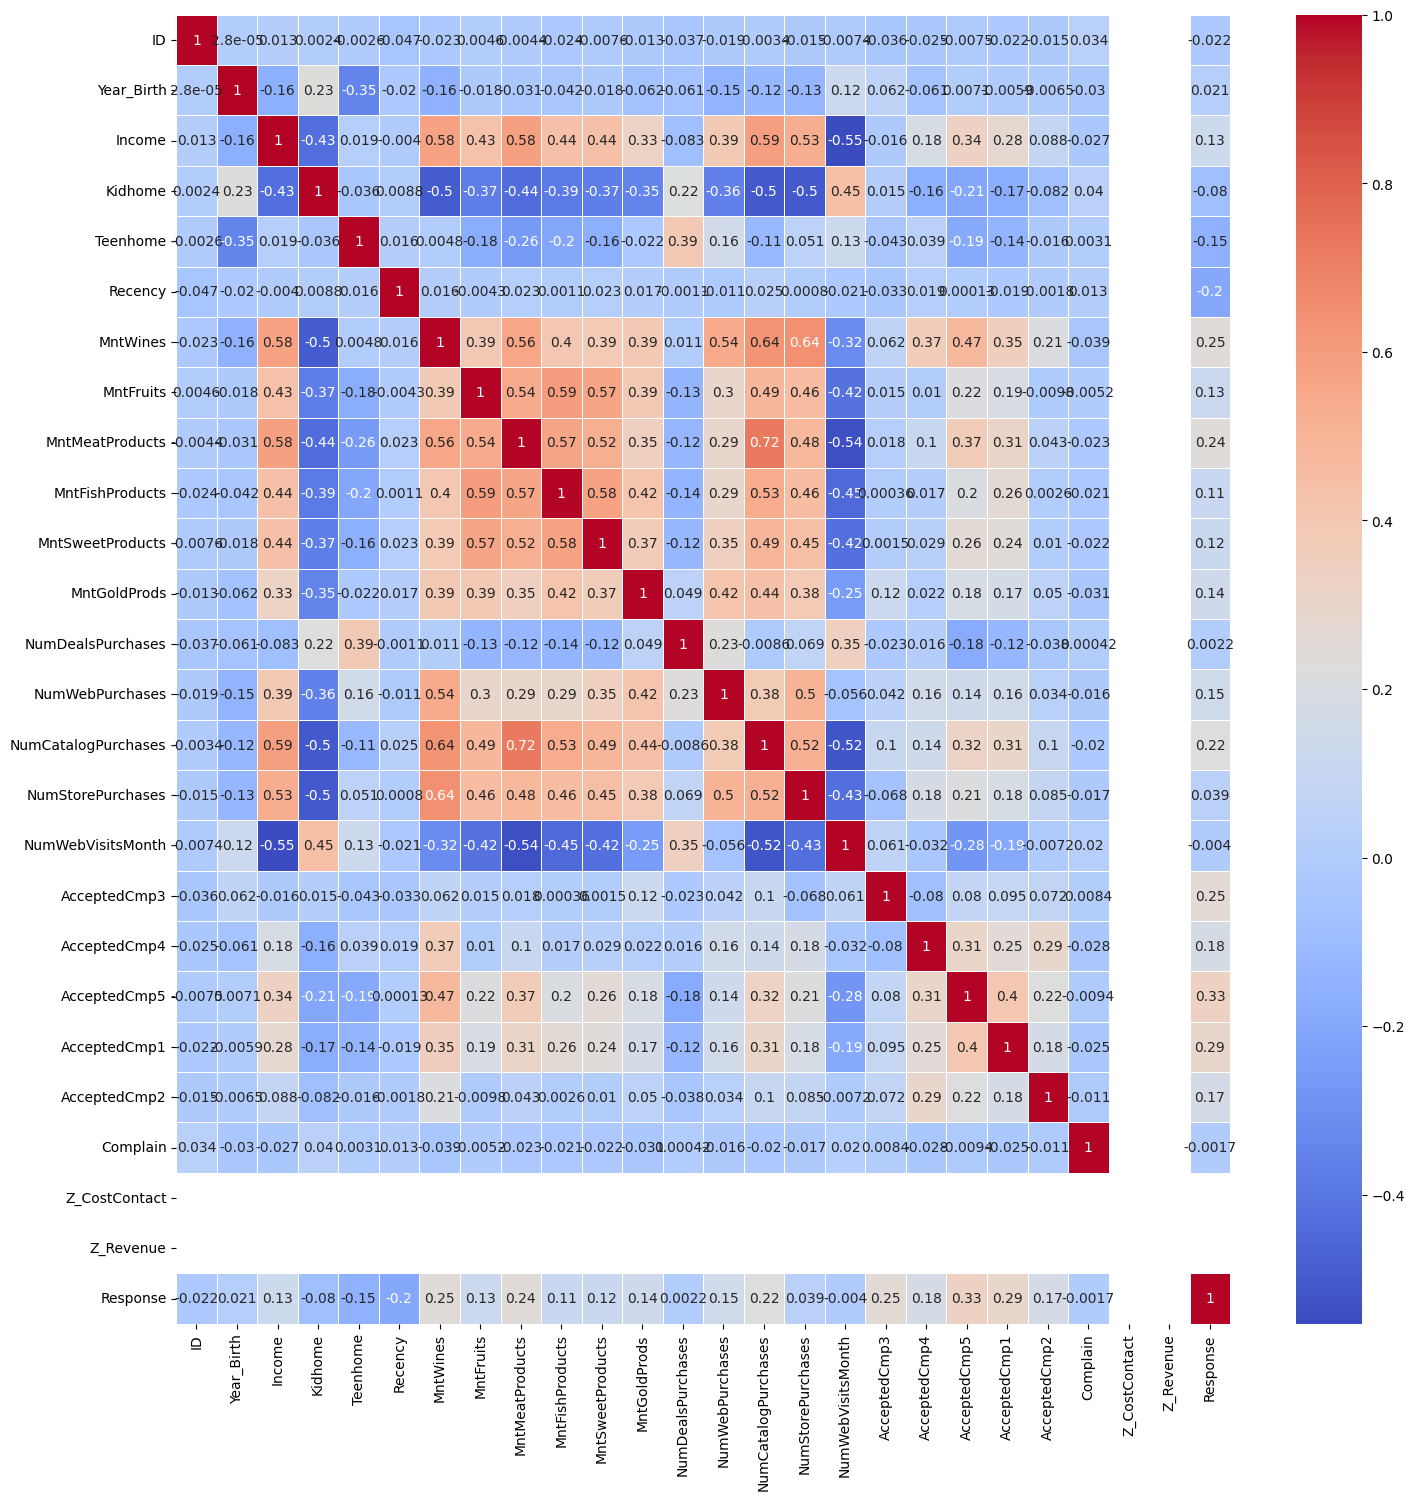

In [16]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

# UniVariate Analysis

In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [18]:
df['ID'].nunique()

2240

In [19]:
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [20]:
df['Year_Birth'].dtype

dtype('int64')

In [21]:

df['Age']=datetime.now().year-df['Year_Birth']

In [22]:
df['Age'].head()

0    68
1    71
2    60
3    41
4    44
Name: Age, dtype: int64

In [23]:
df['Age'].describe()

count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

In [24]:
df['Age'].dtype

dtype('int64')

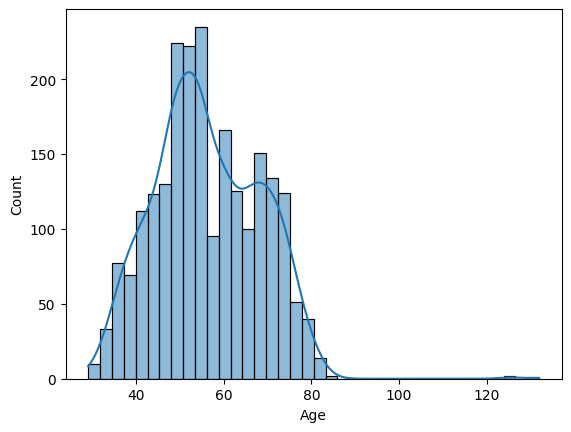

In [25]:
sns.histplot(df['Age'],kde=True)
plt.show()

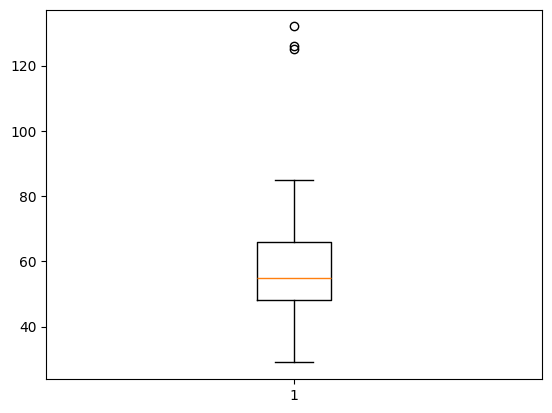

In [26]:
age_box=plt.boxplot(df['Age'])
plt.show()

In [27]:
age_out=[]
for i in age_box['fliers']:
    age_out.append(i.get_ydata())
age_out

[array([125, 132, 126])]

In [28]:
df[df['Age']>100]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
192  2013-09-26       99        15  ...             0             0   
239  2014-05-17       23         8  ...             0             0   
339  2013-09-26       36       755  ...             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
192             0             0             0         1              3   
239             0             0             0         0              3   
339             1             0             0         0              3   

     Z_Revenue  Response  Age  
192         11         0  125  
239         11         0  132  
339         11         0  126  

[3 rows x 30 columns]

In [29]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
# Cap values
df['Age'] = np.where(df['Age'] > upper_limit, upper_limit,
           np.where(df['Age'] < lower_limit, lower_limit, df['Age']))

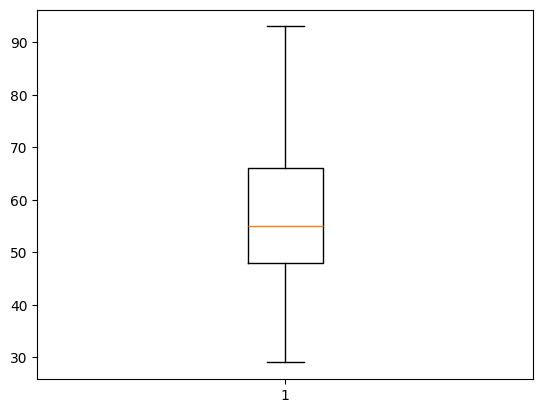

In [30]:
age_box=plt.boxplot(df['Age'])
plt.show()

In [34]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [35]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

In [36]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

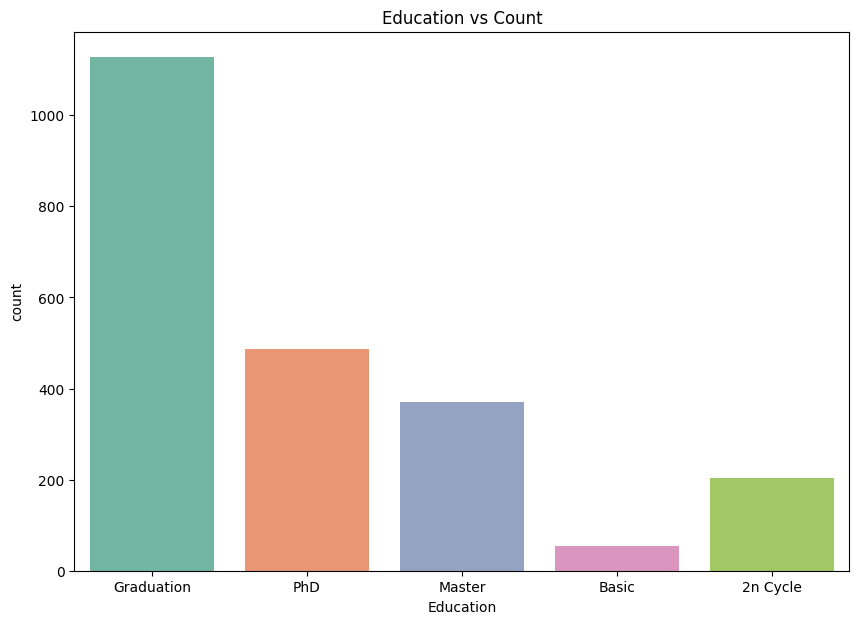

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(x='Education',data=df,palette='Set2')
plt.title('Education vs Count')
plt.show()

In [38]:
edu=df.groupby('Education')['Income'].agg(['min','max','mean']).reset_index()
print(edu)

    Education     min       max          mean
0    2n Cycle  7500.0   96547.0  47633.190000
1       Basic  7500.0   34445.0  20306.259259
2  Graduation  1730.0  666666.0  52720.373656
3      Master  6560.0  157733.0  52917.534247
4         PhD  4023.0  162397.0  56145.313929


In [39]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [40]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

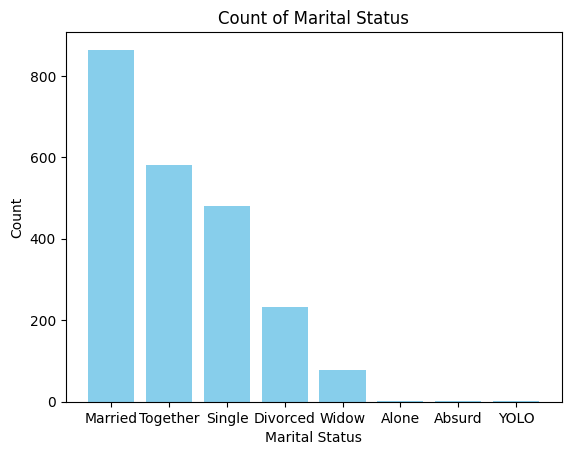

In [41]:
counts = df['Marital_Status'].value_counts()
plt.bar(counts.index, counts.values, color='skyblue')
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [42]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',       # treat alone as single
    'Absurd': np.nan,        # invalid
    'YOLO': np.nan           # invalid
})

In [43]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', nan],
      dtype=object)

In [44]:
df['Marital_Status'].isnull().sum()

np.int64(4)

In [45]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: count, dtype: int64

In [46]:
mar_mode=df['Marital_Status'].mode()[0]
mar_mode

'Married'

In [47]:
df['Marital_Status']=df['Marital_Status'].fillna(mar_mode)

In [48]:
df['Marital_Status'].isnull().sum()

np.int64(0)

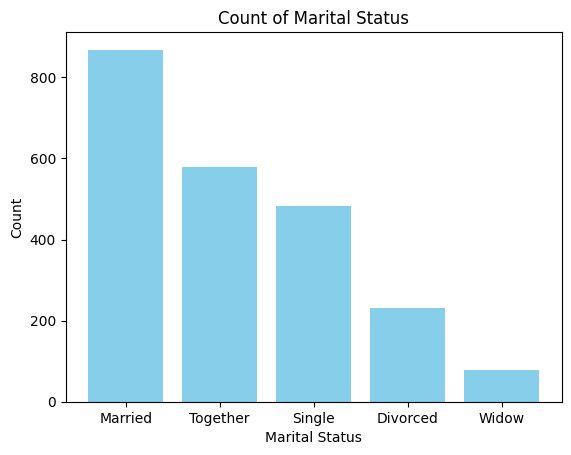

In [49]:
counts = df['Marital_Status'].value_counts()
plt.bar(counts.index, counts.values, color='skyblue')
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [49]:
df['Income'].head()

In [324]:
df['Income'].describe()

count      2240.000000
mean      52003.229289
std       21452.968633
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      162397.000000
Name: Income, dtype: float64

In [325]:
df['Income'].isnull().sum()

np.int64(0)

In [50]:
# Group by Martial Status and find Min & Max salary
result = df.groupby('Marital_Status').agg(
    Min_Salary=('Income', 'min'),
    Max_Salary=('Income', 'max'),
    mean_salary=('Income','mean')
).reset_index()

print(result)

  Marital_Status  Min_Salary  Max_Salary   mean_salary
0       Divorced      1730.0    153924.0  52834.228448
1        Married      2447.0    160803.0  51765.275261
2         Single      3502.0    113734.0  50949.740506
3       Together      5648.0    666666.0  53245.534031
4          Widow     22123.0     85620.0  56481.552632


In [51]:
result = df.groupby(['Marital_Status', 'Education']).agg(
    Min_Income=('Income', 'min'),
    Max_Income=('Income', 'max'),
    Mean_Income=('Income', 'mean'),
    Median_Income=('Income', 'median')
).reset_index()
print(result)

   Marital_Status   Education  Min_Income  Max_Income   Mean_Income  \
0        Divorced    2n Cycle     11448.0     87305.0  49395.130435   
1        Divorced       Basic      9548.0      9548.0   9548.000000   
2        Divorced  Graduation      1730.0    153924.0  54526.042017   
3        Divorced      Master     10979.0     81380.0  50331.945946   
4        Divorced         PhD     14849.0     90687.0  53096.615385   
5         Married    2n Cycle      7500.0     96547.0  46201.100000   
6         Married       Basic      7500.0     34445.0  21960.500000   
7         Married  Graduation      2447.0     94642.0  50866.406977   
8         Married      Master      7500.0     92163.0  53373.805755   
9         Married         PhD      4023.0    160803.0  58036.927083   
10         Single    2n Cycle     23331.0     89572.0  53673.944444   
11         Single       Basic      7500.0     26868.0  18238.666667   
12         Single  Graduation      3502.0    101970.0  51252.765182   
13    

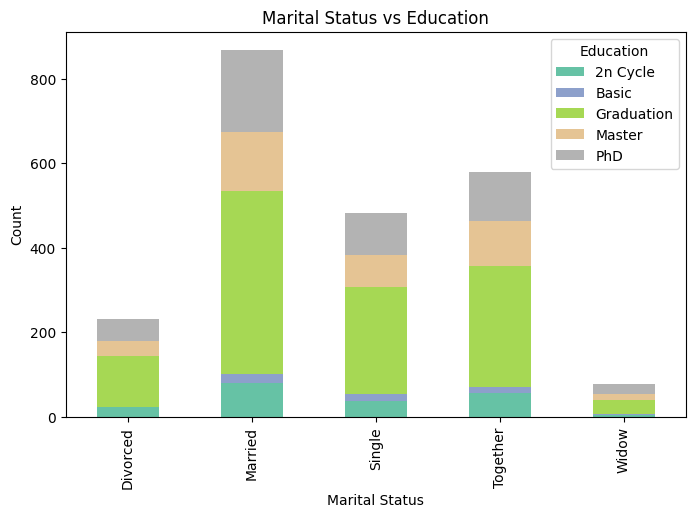

In [52]:
cross_tab = pd.crosstab(df['Marital_Status'], df['Education'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title('Marital Status vs Education')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


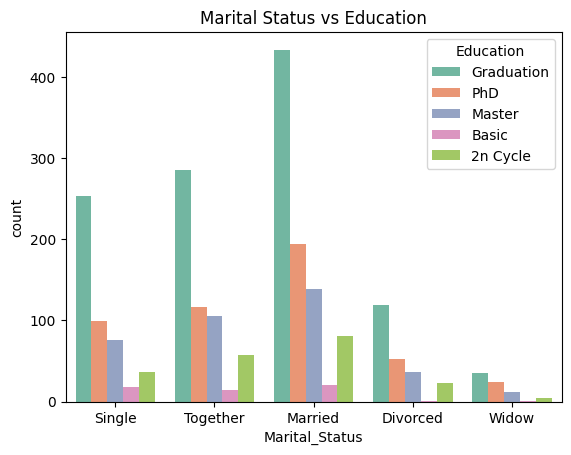

In [53]:
sns.countplot(x='Marital_Status', hue='Education', data=df, palette='Set2')
plt.title('Marital Status vs Education')
plt.show()


In [54]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [55]:
df['Income'].head()

0    58138.0
1    46344.0
2    71613.0
3    26646.0
4    58293.0
Name: Income, dtype: float64

In [56]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [57]:
df['Income'].isnull().sum()

np.int64(24)

In [58]:
# Fill NaN in Income with the mean income for each Marital_Status + Education group
df['Income'] = df['Income'].fillna(
    df.groupby(['Marital_Status', 'Education'])['Income'].transform('mean')
)

In [59]:
df['Income'].isnull().sum()

np.int64(0)

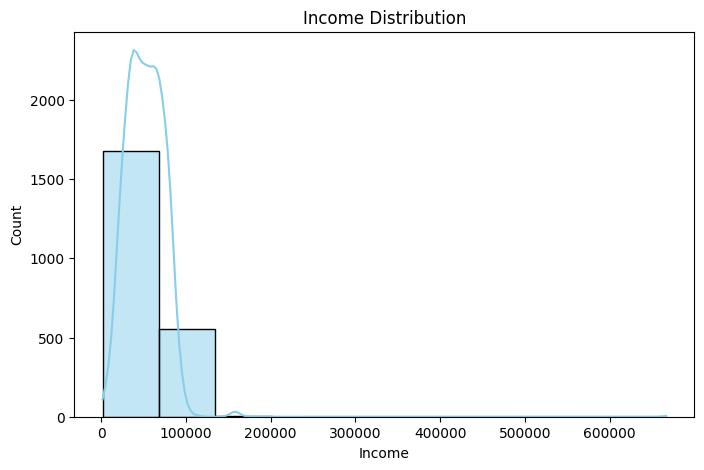

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income'],bins=10, kde=True, color='skyblue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

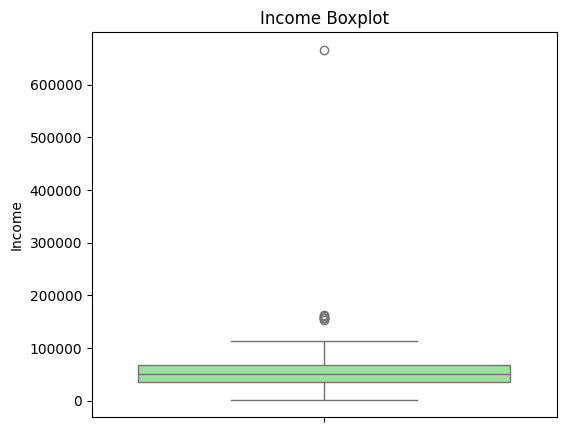

In [61]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df['Income'], color='lightgreen')
plt.title('Income Boxplot')
plt.ylabel('Income')
plt.show()


In [62]:
Q1=df['Income'].quantile(0.25)
Q3=df['Income'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [63]:
print(lower_bound)
print(upper_bound)

-13587.75
117416.25


In [64]:
# Income can't be negative So
lower_bound=0

In [65]:
income_box=df[(df['Income']<lower_bound) | (df['Income']>upper_bound)]
income_box['Income']

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

In [66]:
len(income_box)

8

In [67]:
# As per the dataset is about the customers can have income ~ 150000-200000
# So we are going to cap the values that are greater than 200000

In [68]:
df.loc[df['Income']>=200000.0,'Income'] = upper_bound

In [69]:
df['Income'].describe()

count      2240.000000
mean      52003.229289
std       21452.968633
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      162397.000000
Name: Income, dtype: float64

In [70]:
df['Income'].skew()

np.float64(0.3550365774833826)

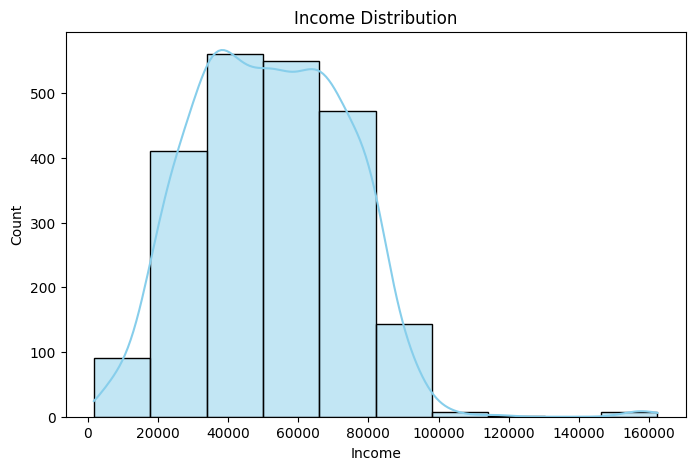

In [71]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins=10, kde=True, color='skyblue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

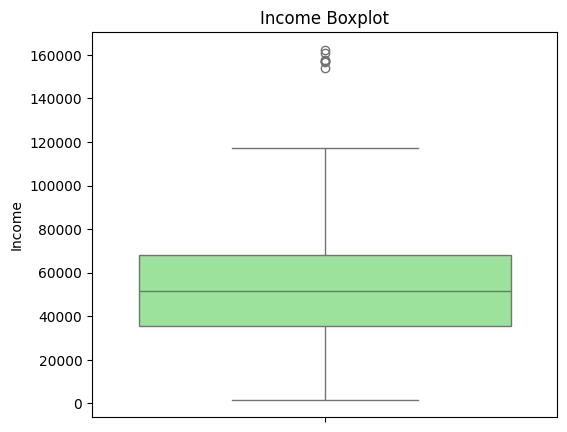

In [72]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df['Income'], color='lightgreen')
plt.title('Income Boxplot')
plt.ylabel('Income')
plt.show()


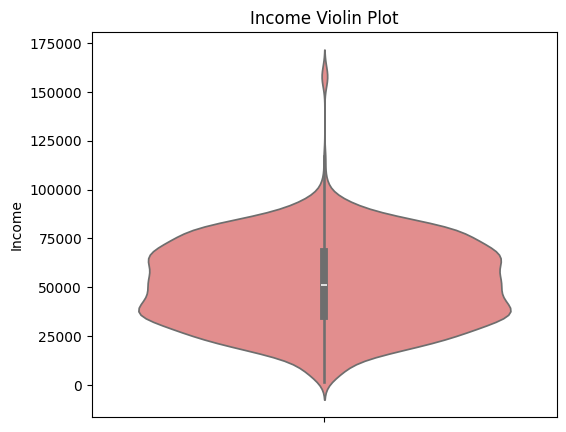

In [73]:
plt.figure(figsize=(6,5))
sns.violinplot(y=df['Income'], color='lightcoral')
plt.title('Income Violin Plot')
plt.show()

In [74]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [75]:
df['Kidhome'].head()

0    0
1    1
2    0
3    1
4    1
Name: Kidhome, dtype: int64

In [76]:
df['Kidhome'].dtype

dtype('int64')

In [77]:
df['Kidhome']=df['Kidhome'].astype('int64')

In [78]:
df['Kidhome'].dtype

dtype('int64')

In [79]:
df['Kidhome'].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

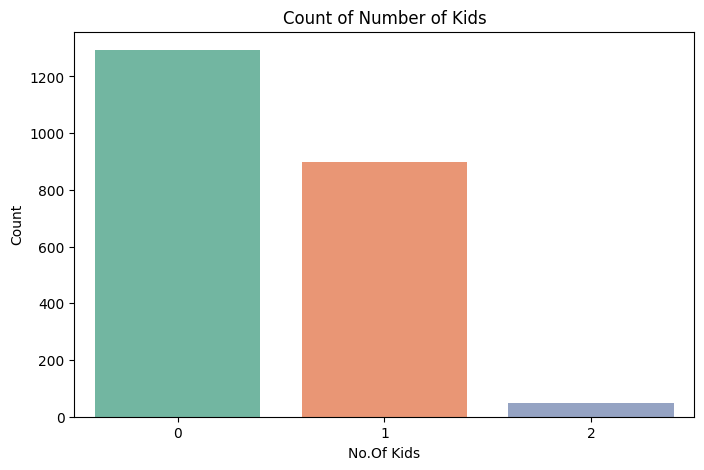

In [80]:
# Vertical countplot
plt.figure(figsize=(8,5))
sns.countplot(x='Kidhome', data=df, palette='Set2')
plt.title('Count of Number of Kids')
plt.xlabel('No.Of Kids')
plt.ylabel('Count')
plt.show()

In [81]:
df['Teenhome'].head()

0    0
1    1
2    0
3    0
4    0
Name: Teenhome, dtype: int64

In [82]:
df['Teenhome'].dtype

dtype('int64')

In [83]:
df['Teenhome']=df['Teenhome'].astype('int64')

In [84]:
df['Teenhome'].dtype

dtype('int64')

In [85]:
df['Teenhome'].value_counts()

Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64

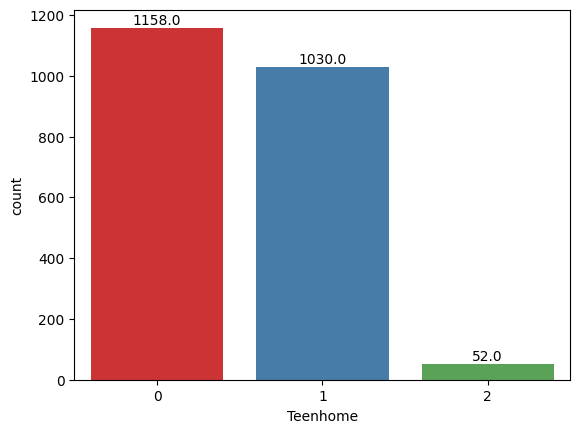

In [86]:
ax = sns.countplot(x='Teenhome', data=df, palette='Set1')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom')
plt.show()


In [87]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [88]:
# Date the customer enrolled or became a client.
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [89]:
df['Dt_Customer'].dtype

dtype('<M8[ns]')

In [90]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')


In [91]:
df['Dt_Customer'].describe()

count                             2240
mean     2013-07-10 10:01:42.857142784
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [92]:
#Number of days since the customer’s last purchase
df['Recency']

0       58
1       38
2       26
3       26
4       94
        ..
2235    46
2236    56
2237    91
2238     8
2239    40
Name: Recency, Length: 2240, dtype: int64

In [93]:
df['Recency'].dtype

dtype('int64')

In [94]:
df['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

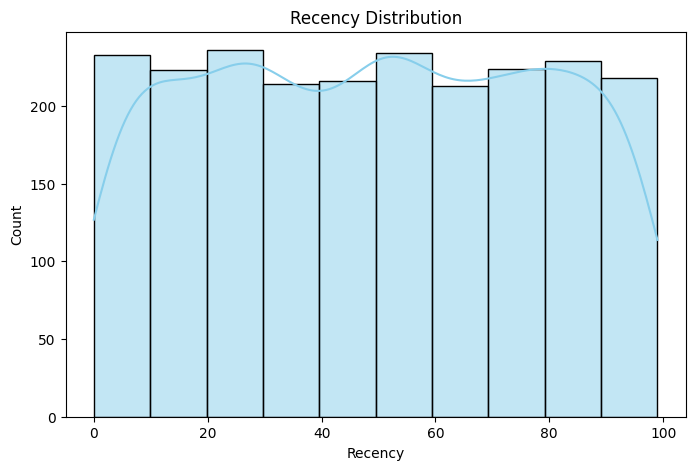

In [95]:
plt.figure(figsize=(8,5))
sns.histplot(df['Recency'], bins=10, kde=True, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.show()

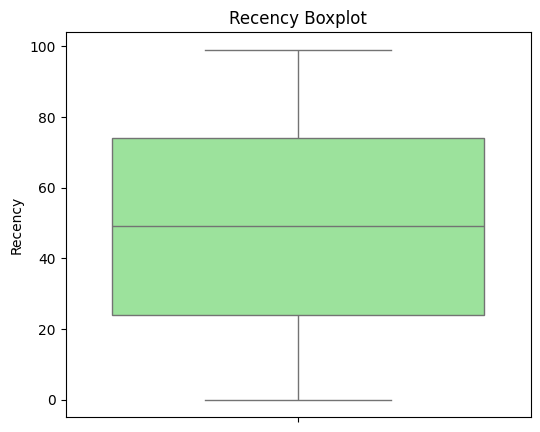

In [96]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df['Recency'], color='lightgreen')
plt.title('Recency Boxplot')
plt.ylabel('Recency')
plt.show()


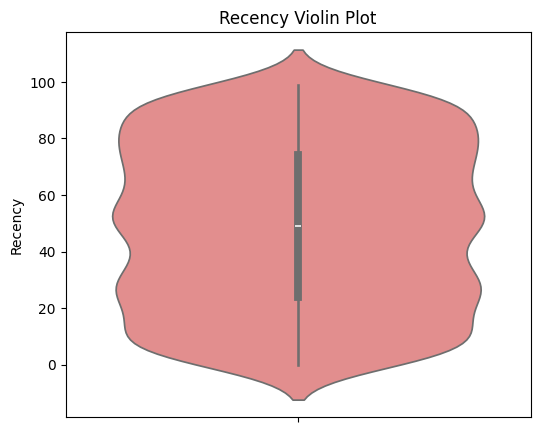

In [97]:
plt.figure(figsize=(6,5))
sns.violinplot(y=df['Recency'], color='lightcoral')
plt.title('Recency Violin Plot')
plt.show()


In [98]:
Q1=df['Recency'].quantile(0.25)
Q3=df['Recency'].quantile(0.75)
IQR=Q3-Q1
lower_bound=0
upper_bound=Q3+1.5*IQR

In [99]:
print(lower_bound,upper_bound)

0 149.0


In [100]:
outliers=df[(df['Recency']<lower_bound) | (df['Recency']>upper_bound)]

In [101]:
outliers # Since there are no outliers

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Age]
Index: []

[0 rows x 30 columns]

In [102]:
df['MntWines']

0       635
1        11
2       426
3        11
4       173
       ... 
2235    709
2236    406
2237    908
2238    428
2239     84
Name: MntWines, Length: 2240, dtype: int64

In [103]:
df['MntWines'].dtype

dtype('int64')

In [104]:
df['MntWines'].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

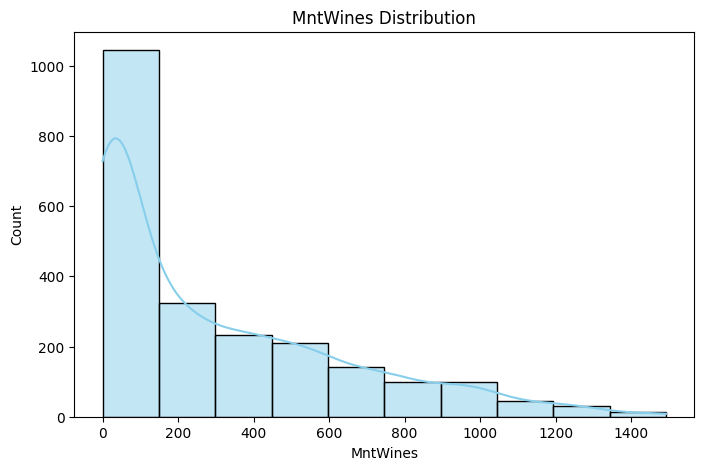

In [105]:
plt.figure(figsize=(8,5))
sns.histplot(df['MntWines'], bins=10, kde=True, color='skyblue')
plt.title('MntWines Distribution')
plt.xlabel('MntWines')
plt.ylabel('Count')
plt.show()

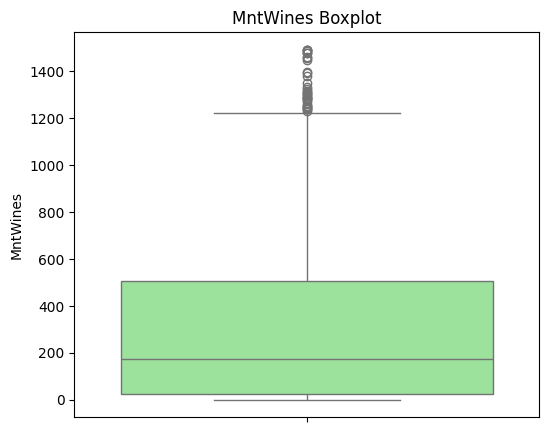

In [106]:
plt.figure(figsize=(6,5))
sns.boxplot(y=df['MntWines'], color='lightgreen')
plt.title('MntWines Boxplot')
plt.ylabel('MntWines')
plt.show()


In [107]:
df['MntWines'].skew()

np.float64(1.1757705637550502)

In [108]:
df['MntWines']=np.sqrt(df['MntWines'])

In [109]:
df['MntWines'].skew()

np.float64(0.39351239091266954)

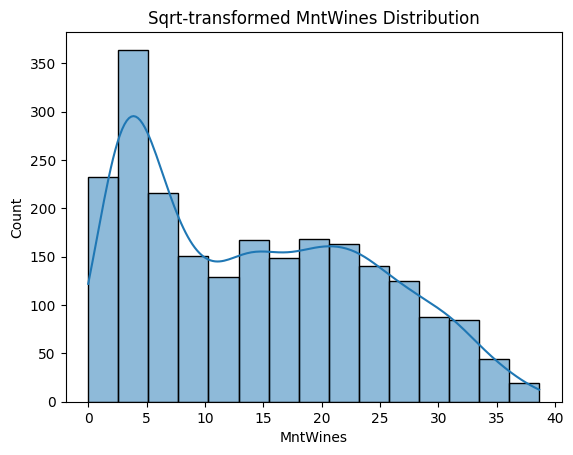

In [110]:
sns.histplot(df['MntWines'], kde=True)
plt.title('Sqrt-transformed MntWines Distribution')
plt.show()


In [111]:
df['MntWines'].describe()

count    2240.000000
mean       14.301935
std         9.971698
min         0.000000
25%         4.873192
50%        13.171926
75%        22.455510
max        38.639358
Name: MntWines, dtype: float64

In [112]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [113]:
# Amount spent on fruits.
df['MntFruits']

0       88
1        1
2       49
3        4
4       43
        ..
2235    43
2236     0
2237    48
2238    30
2239     3
Name: MntFruits, Length: 2240, dtype: int64

In [114]:
df['MntFruits'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: MntFruits
Non-Null Count  Dtype
--------------  -----
2240 non-null   int64
dtypes: int64(1)
memory usage: 17.6 KB


In [115]:
df['MntFruits'].describe()

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

In [116]:
df['MntFruits'].dtype

dtype('int64')

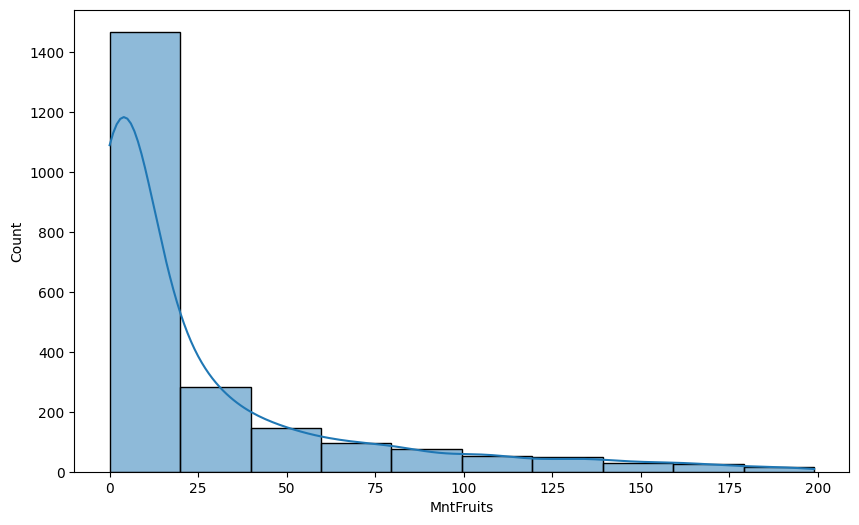

In [117]:
plt.figure(figsize=(10,6))
sns.histplot(df['MntFruits'],bins=10,kde=True)
plt.show()

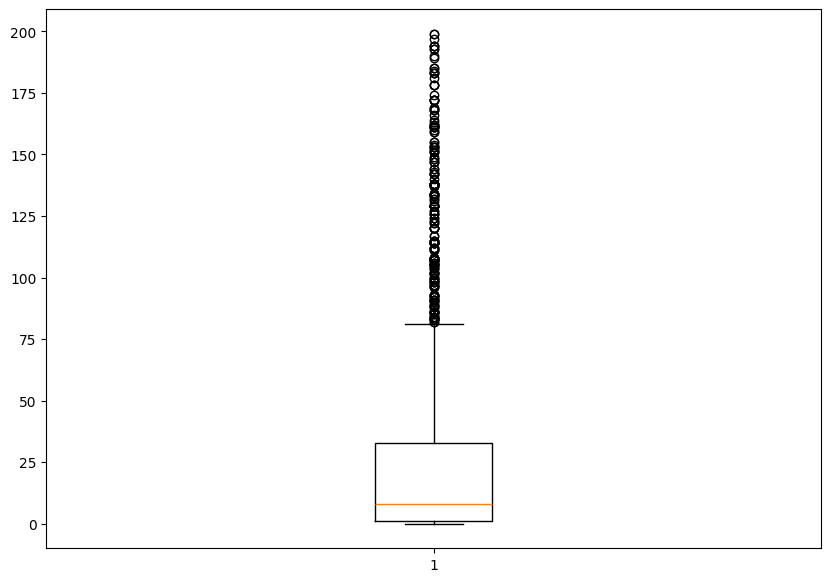

In [118]:
plt.figure(figsize=(10,7))
fruits_box=plt.boxplot(df['MntFruits'])
plt.show()

In [119]:

# saving the outliers in a list
out=[]
for i in fruits_box['fliers']:
    out.append(i.get_ydata())
out

[array([ 88, 100, 164, 120, 107, 111, 105, 172, 106, 194, 115,  99,  90,
        133, 106, 162, 189, 138,  86, 114, 153, 134, 148,  84, 162, 129,
         98, 183, 129, 147, 138, 153, 144, 104,  91, 163, 134, 152, 105,
        114, 137, 190,  96,  84, 162, 138,  83,  92, 134, 155, 151,  85,
        129, 153, 129, 183, 127,  91, 107, 129, 103,  89, 105, 181, 112,
        159, 134, 102,  86, 123, 166, 142, 133, 178,  93, 107,  97, 115,
        168,  91, 148, 174, 122, 123,  91, 199, 102, 138, 101,  92,  99,
        111, 152,  86,  98,  85, 107, 137, 138, 168,  93, 114,  98, 172,
         96, 114,  83, 117, 114, 178, 108, 130, 161, 138, 124, 126, 105,
         83, 120, 142, 104, 100,  83, 106, 161, 185, 147, 112, 162,  86,
        108, 161, 129,  93,  93, 172,  87, 168, 151, 102,  84, 199,  97,
        127,  89, 172, 161, 104, 197, 137, 111,  98, 194,  82, 184,  88,
         99, 120, 160, 107, 108, 185, 115,  96, 133, 112, 140, 107, 107,
        102, 117, 131,  91, 126, 129, 147,  97, 132

In [120]:
len(out[0])

227

In [121]:
df['MntFruits'].skew()

np.float64(2.1020633046228268)

In [122]:
df['MntFruits']=np.log1p(df['MntFruits'])

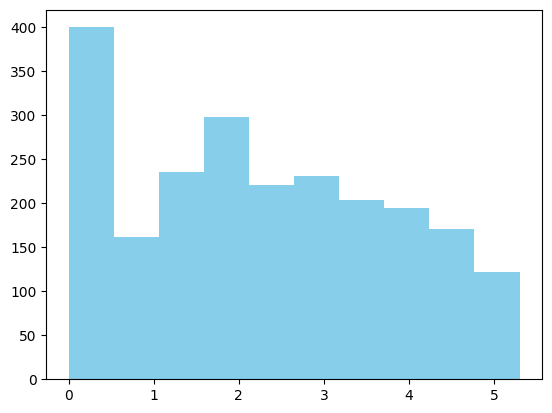

In [123]:
plt.hist(df['MntFruits'],bins=10,color='skyblue')
plt.show()

In [124]:
df['MntFruits'].skew()

np.float64(0.08385812808822958)

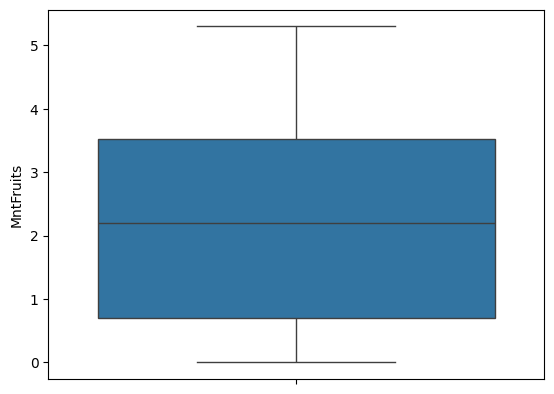

In [125]:
sns.boxplot(df['MntFruits'])
plt.show()

In [126]:
df['MntFruits'].describe()

count    2240.000000
mean        2.238966
std         1.570430
min         0.000000
25%         0.693147
50%         2.197225
75%         3.526361
max         5.298317
Name: MntFruits, dtype: float64

In [127]:
# Amount spent on meat products.
df['MntMeatProducts']

0       546
1         6
2       127
3        20
4       118
       ... 
2235    182
2236     30
2237    217
2238    214
2239     61
Name: MntMeatProducts, Length: 2240, dtype: int64

In [128]:
df['MntMeatProducts'].describe()

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [129]:
df['MntMeatProducts'].dtype

dtype('int64')

In [130]:
df['MntMeatProducts'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: MntMeatProducts
Non-Null Count  Dtype
--------------  -----
2240 non-null   int64
dtypes: int64(1)
memory usage: 17.6 KB


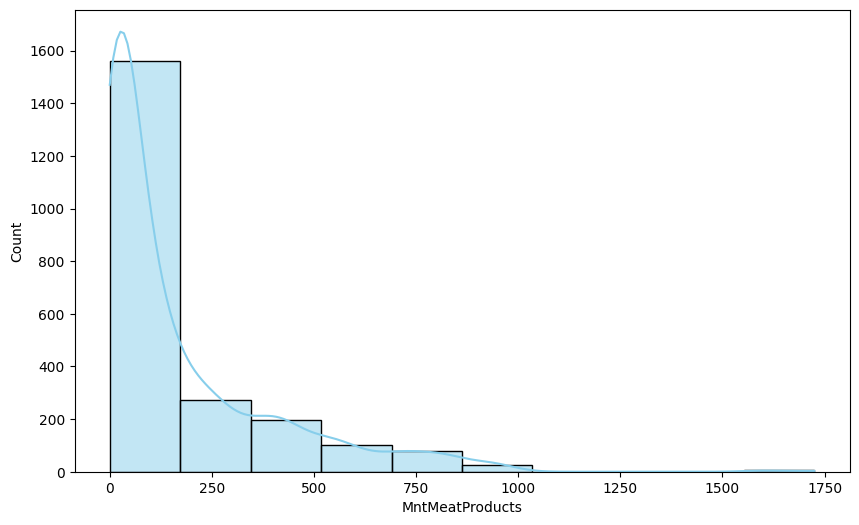

In [131]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['MntMeatProducts'],bins=10,kde=True,color='skyblue')
plt.show()

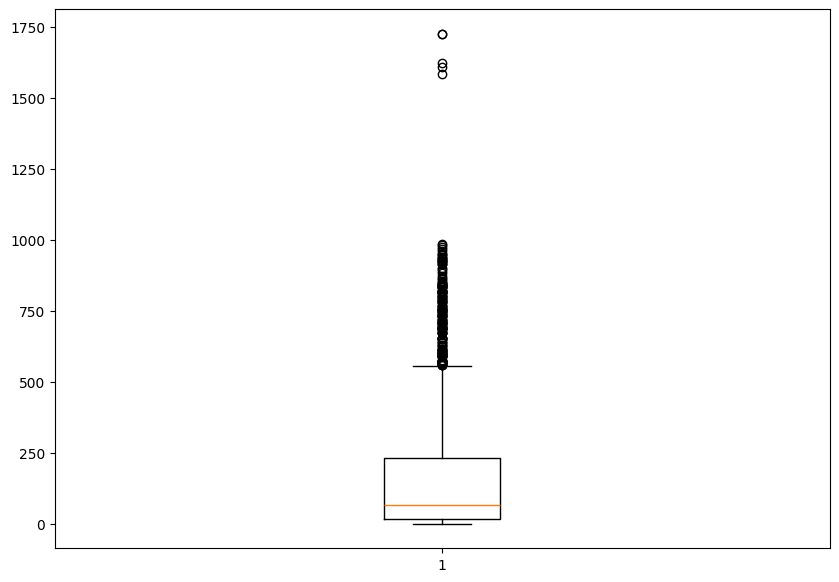

In [132]:
plt.figure(figsize=(10,7))
meat_box=plt.boxplot(df['MntMeatProducts'])
plt.show()

In [133]:
df['MntMeatProducts'].skew()

np.float64(2.083233112943474)

In [134]:
meat_out=[]
for i in meat_box['fliers']:
    meat_out.append(i.get_ydata())
print(len(meat_out[0]))
meat_out

175


[array([1725,  801,  780,  925,  779,  568,  690,  812,  951,  590,  921,
         756, 1582,  813,  740,  757,  768,  565,  573,  561,  570,  562,
         832,  785,  818,  815,  786,  591,  716,  792,  974,  594,  613,
         670,  925,  761,  940,  797,  635,  592,  572,  732,  713,  653,
         758,  711,  838, 1622,  559,  597,  706,  617,  742,  689,  898,
         706,  597,  747,  804,  774,  929,  845,  569,  838,  685,  873,
         674,  890,  704,  606,  790,  925,  651,  708,  640,  733,  961,
         568,  780,  678,  842,  843,  711,  818,  864,  750,  731,  604,
         915,  689,  801,  913,  946,  672,  611,  687,  842,  622,  790,
         717,  573,  984,  694,  595,  672,  573,  601,  731,  717,  687,
         815,  706,  724,  827,  560,  701,  915,  639,  573,  625,  649,
         832,  575,  599, 1725,  768,  673,  850,  835,  936,  935,  853,
         558,  751,  693,  629,  981,  586,  565,  697,  736,  602,  590,
         899,  816,  603,  754,  835, 

In [135]:
df['MntMeatProducts']=np.log1p(df['MntMeatProducts'])

In [136]:
df['MntMeatProducts'].skew()

np.float64(-0.08269187787516818)

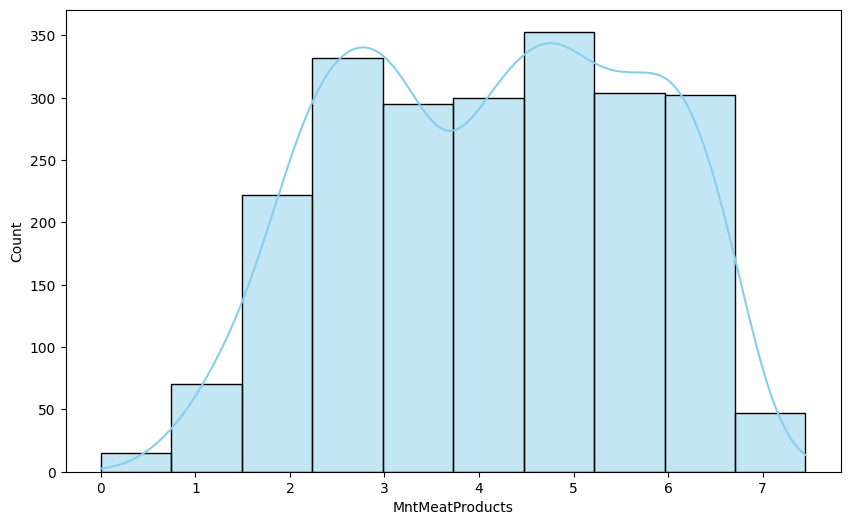

In [137]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['MntMeatProducts'],bins=10,kde=True,color='skyblue')
plt.show()

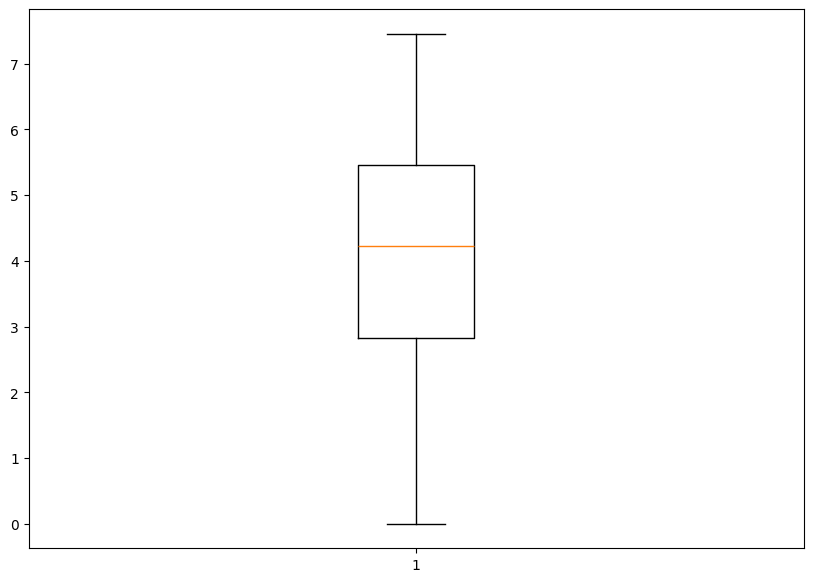

In [138]:
plt.figure(figsize=(10,7))
meat_box=plt.boxplot(df['MntMeatProducts'])
plt.show()

In [139]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [140]:
df['MntFishProducts']

0       172
1         2
2       111
3        10
4        46
       ... 
2235     42
2236      0
2237     32
2238     80
2239      2
Name: MntFishProducts, Length: 2240, dtype: int64

In [141]:
df['MntFishProducts'].describe()

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64

In [142]:
df['MntFishProducts'].dtype

dtype('int64')

In [143]:
df['MntFishProducts'].skew()

np.float64(1.9197689706698498)

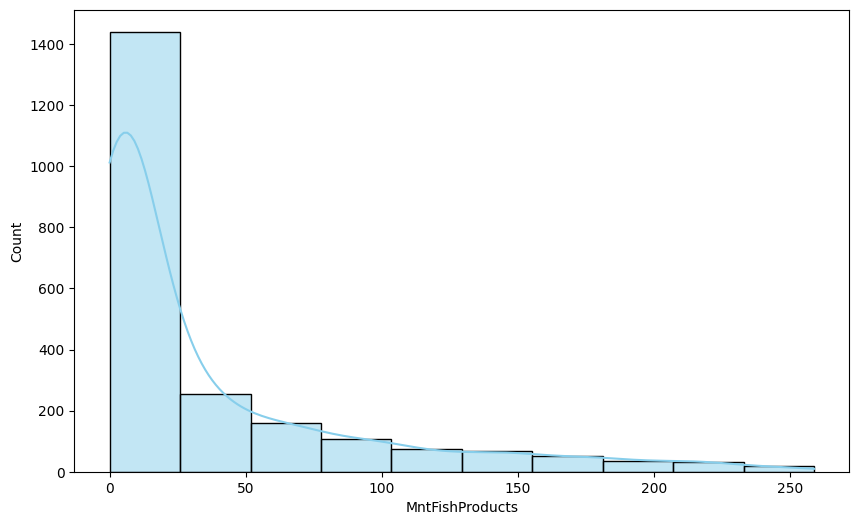

In [144]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['MntFishProducts'],bins=10,kde=True,color='skyblue')
plt.show()

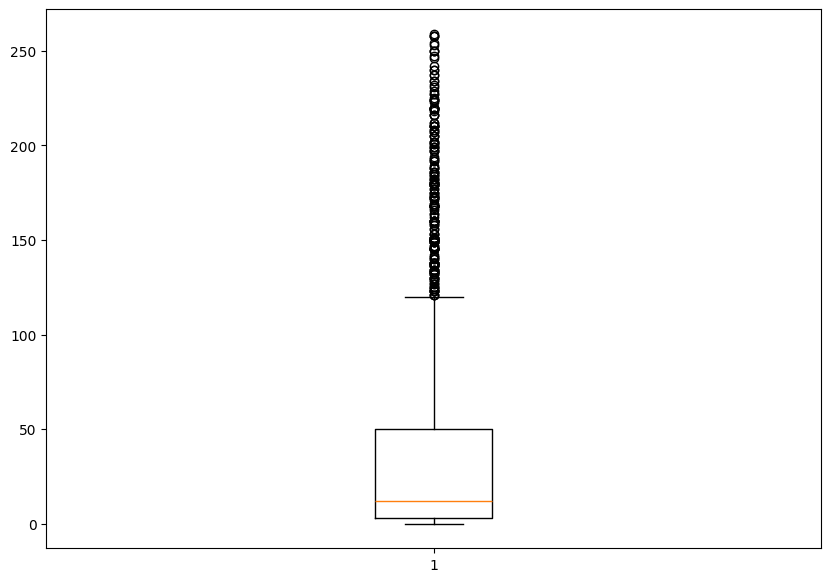

In [145]:
plt.figure(figsize=(10,7))
fish_box=plt.boxplot(df['MntFishProducts'])
plt.show()

<Axes: ylabel='MntFishProducts'>

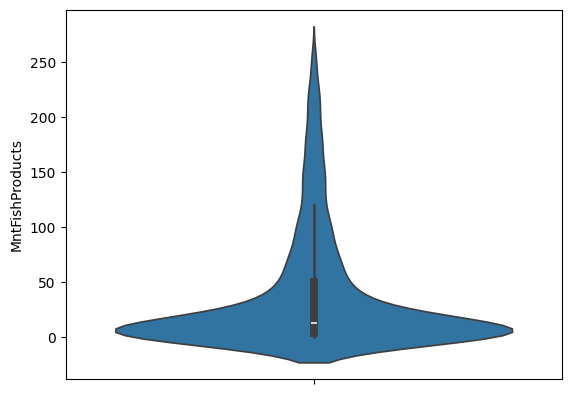

In [146]:
sns.violinplot(df['MntFishProducts'])

In [147]:
fish_out=[]
for i in fish_box['fliers']:
    fish_out.append(i.get_ydata())
fish_out

[array([172, 225, 150, 160, 227, 156, 180, 121, 201, 189, 137, 185, 151,
        123, 173, 149, 134, 173, 140, 147, 224, 254, 180, 186, 218, 133,
        150, 220, 205, 162, 188, 150, 150, 166, 216, 219, 151, 172, 212,
        129, 151, 137, 156, 179, 179, 149, 197, 220, 199, 205, 169, 240,
        146, 224, 127, 136, 168, 132, 147, 231, 168, 202, 125, 175, 179,
        133, 121, 172, 164, 177, 138, 138, 175, 247, 127, 150, 227, 159,
        153, 123, 134, 202, 234, 210, 133, 168, 160, 160, 194, 250, 138,
        146, 220, 237, 250, 145, 167, 160, 150, 168, 192, 180, 137, 130,
        232, 132, 125, 168, 132, 145, 184, 134, 240, 186, 125, 219, 237,
        123, 138, 158, 216, 259, 168, 219, 186, 151, 145, 133, 137, 207,
        160, 210, 172, 182, 141, 182, 124, 171, 193, 160, 130, 242, 175,
        180, 246, 188, 210, 234, 197, 210, 197, 219, 149, 149, 185, 142,
        140, 253, 169, 220, 258, 134, 123, 146, 258, 179, 207, 198, 153,
        141, 168, 138, 223, 151, 258, 188, 145, 224

In [148]:
len(fish_out[0])

223

In [149]:
df['MntFishProducts']=np.log1p(df['MntFishProducts'])


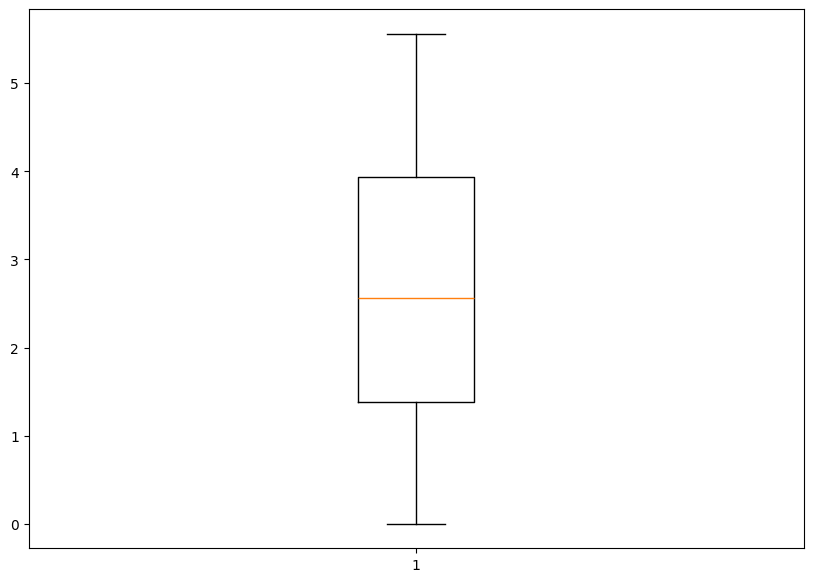

In [150]:
plt.figure(figsize=(10,7))
fish_box=plt.boxplot(df['MntFishProducts'])
plt.show()

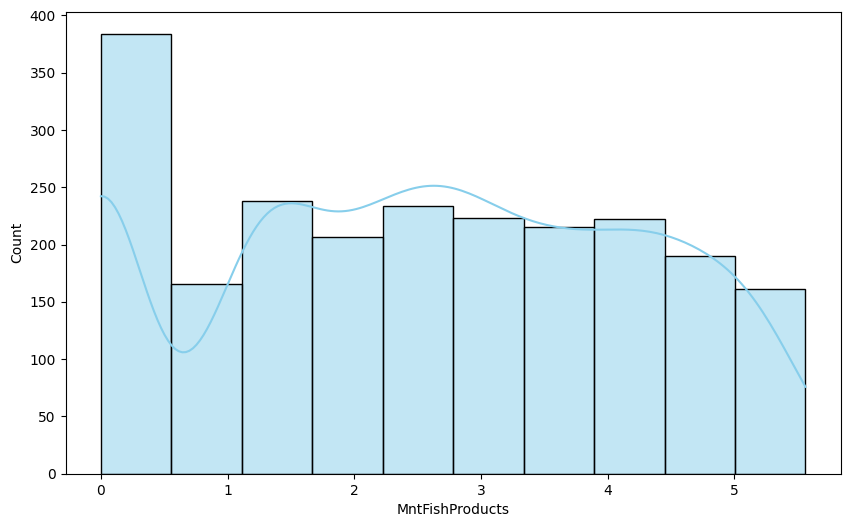

In [151]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['MntFishProducts'],bins=10,kde=True,color='skyblue')
plt.show()

In [152]:
df['MntFishProducts'].describe()

count    2240.000000
mean        2.534820
std         1.657324
min         0.000000
25%         1.386294
50%         2.564949
75%         3.931826
max         5.560682
Name: MntFishProducts, dtype: float64

In [153]:
#Amount spent on sweets.
df['MntSweetProducts']

0        88
1         1
2        21
3         3
4        27
       ... 
2235    118
2236      0
2237     12
2238     30
2239      1
Name: MntSweetProducts, Length: 2240, dtype: int64

In [154]:
df['MntSweetProducts'].describe()

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: MntSweetProducts, dtype: float64

In [155]:
df['MntSweetProducts'].dtype

dtype('int64')

In [156]:
def visualize_column(df, column):
    #Plots Histogram, Boxplot, and Violin Plot for one numeric column
    # Create the 3 plots
    plt.figure(figsize=(15, 6))
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[column], fliersize=3)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df[column], inner='box')
    plt.title(f'Violin Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

<Figure size 1500x1000 with 0 Axes>

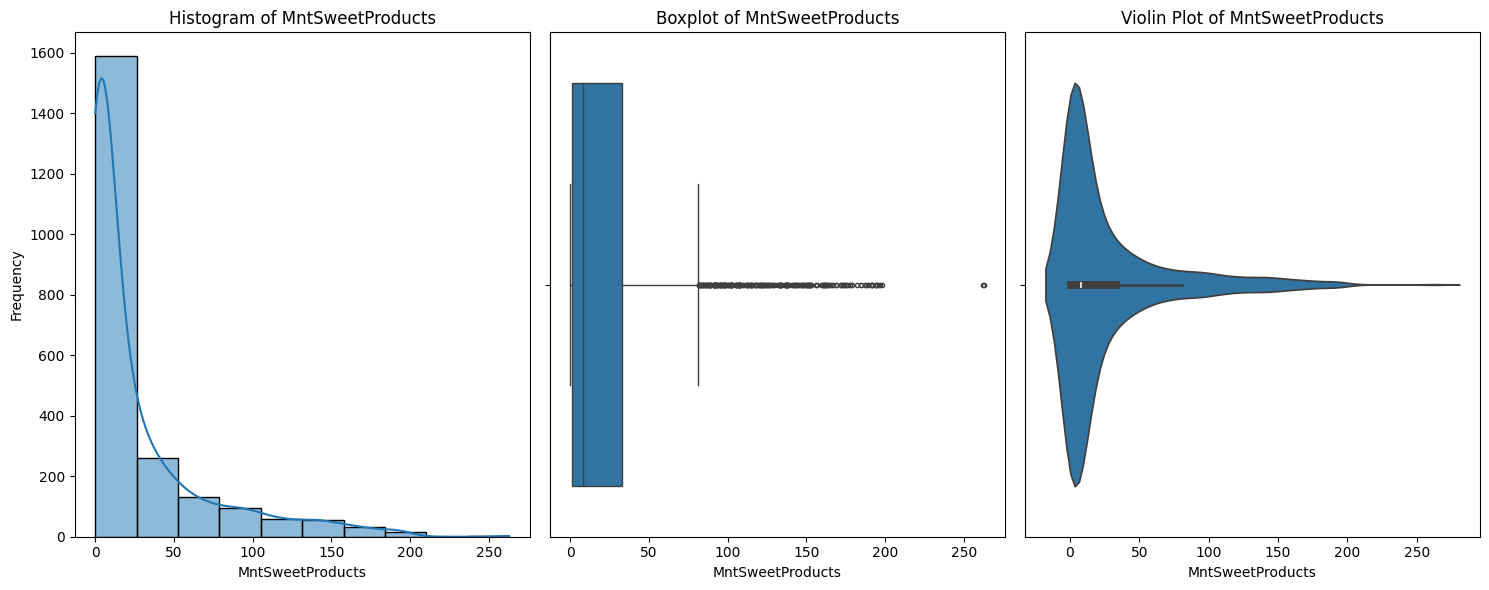

In [157]:
plt.figure(figsize=(15,10))

visualize_column(df,'MntSweetProducts')

In [158]:
df['MntSweetProducts'].skew()

np.float64(2.136080712154738)

In [159]:
Q1=df['MntSweetProducts'].quantile(0.25)
Q3=df['MntSweetProducts'].quantile(0.75)
IQR=Q3-Q1
lower_bound=0
upper_bound=Q3+1.5*IQR

In [160]:
print(upper_bound)

81.0


In [161]:
sweet_out=df[(df['MntSweetProducts']<lower_bound) | (df['MntSweetProducts']>upper_bound)]

In [162]:
sweet_out['MntSweetProducts']

0        88
12      112
27      263
40      178
51      167
       ... 
2175     92
2190    111
2193    133
2217    125
2235    118
Name: MntSweetProducts, Length: 248, dtype: int64

In [163]:
df['MntSweetProducts']=np.log1p(df['MntSweetProducts'])
df['MntSweetProducts'].skew()

np.float64(0.0856828614720598)

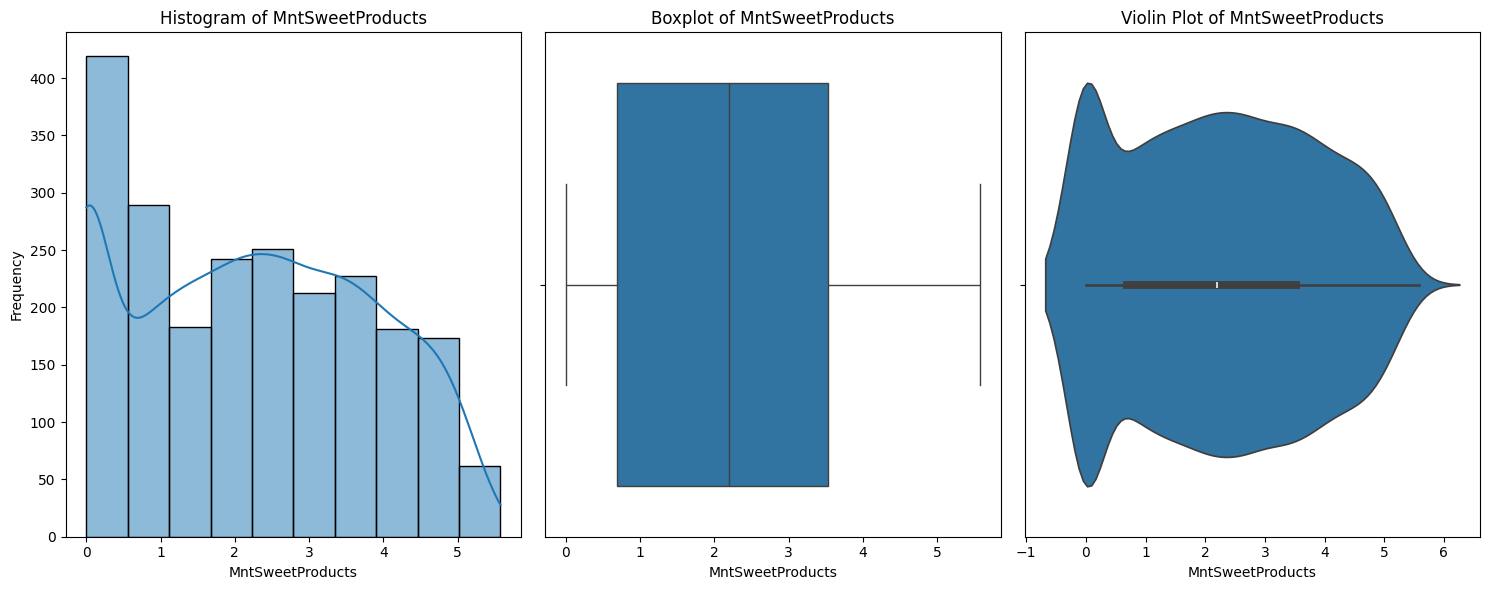

In [164]:
visualize_column(df,'MntSweetProducts')

In [165]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [166]:
# Amount spent on gold or luxury products.
df['MntGoldProds']

0        88
1         6
2        42
3         5
4        15
       ... 
2235    247
2236      8
2237     24
2238     61
2239     21
Name: MntGoldProds, Length: 2240, dtype: int64

In [167]:
df['MntGoldProds'].dtype

dtype('int64')

In [168]:
df['MntGoldProds'].describe()

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: MntGoldProds, dtype: float64

In [169]:
df['MntGoldProds'].skew()

np.float64(1.8861056091894417)

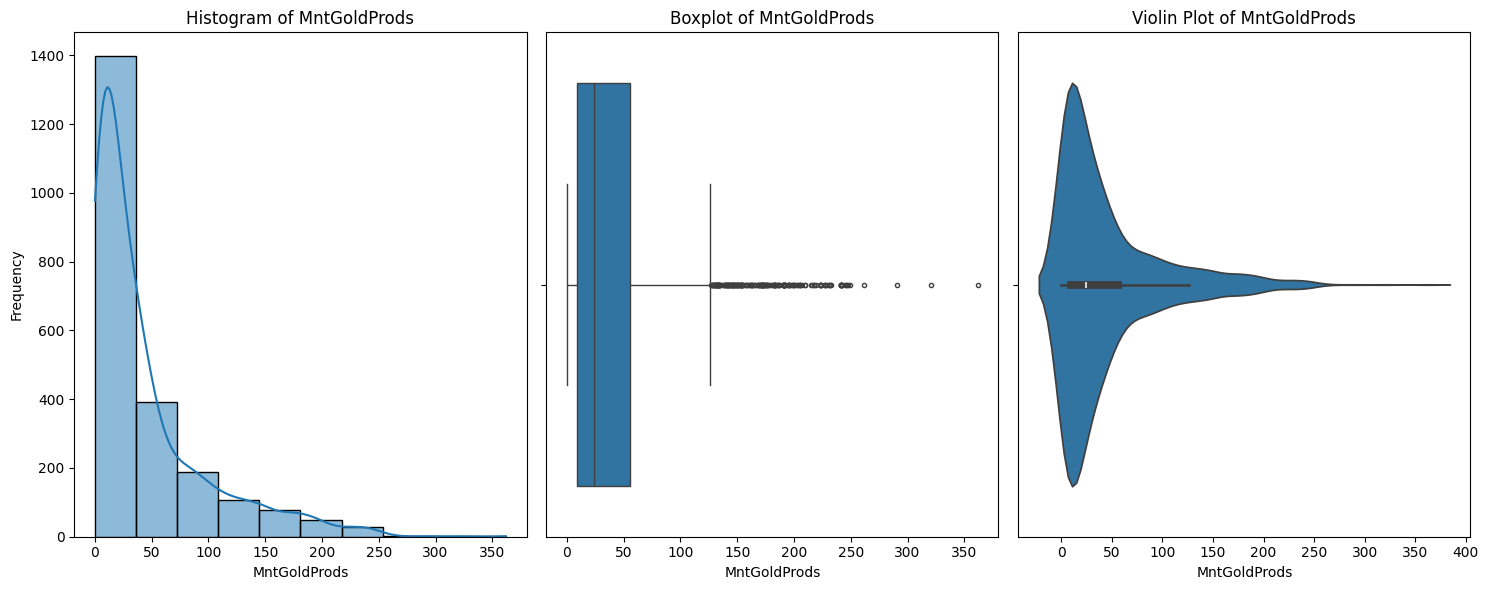

In [170]:
visualize_column(df,'MntGoldProds')

In [171]:
Q1=df['MntGoldProds'].quantile(0.25)
Q3=df['MntGoldProds'].quantile(0.75)
IQR=Q3-Q1
lower_bound=0
upper_bound=Q3+1.5*IQR

In [172]:
gold_out=df[(df['MntGoldProds']<lower_bound) | (df['MntGoldProds']>upper_bound)]

In [173]:
gold_out['MntGoldProds']

18      176
27      362
45      174
53      241
55      190
       ... 
2178    227
2188    163
2194    174
2198    152
2235    247
Name: MntGoldProds, Length: 207, dtype: int64

In [174]:
x=np.sqrt(df['MntGoldProds'])
x.skew()

np.float64(0.8089730305841049)

In [175]:
y=np.log1p(df['MntGoldProds'])
y.skew()

np.float64(-0.3414276776271396)

In [176]:
y_original=np.exp(y)
y_original.skew()

np.float64(1.886105609189442)

In [177]:

df['MntGoldProds'] , fitted_lambda = stats.boxcox(df['MntGoldProds'] + 1)  # add 1 if zeros exist


In [178]:
df['MntGoldProds'].skew()

np.float64(-0.030452681605448964)

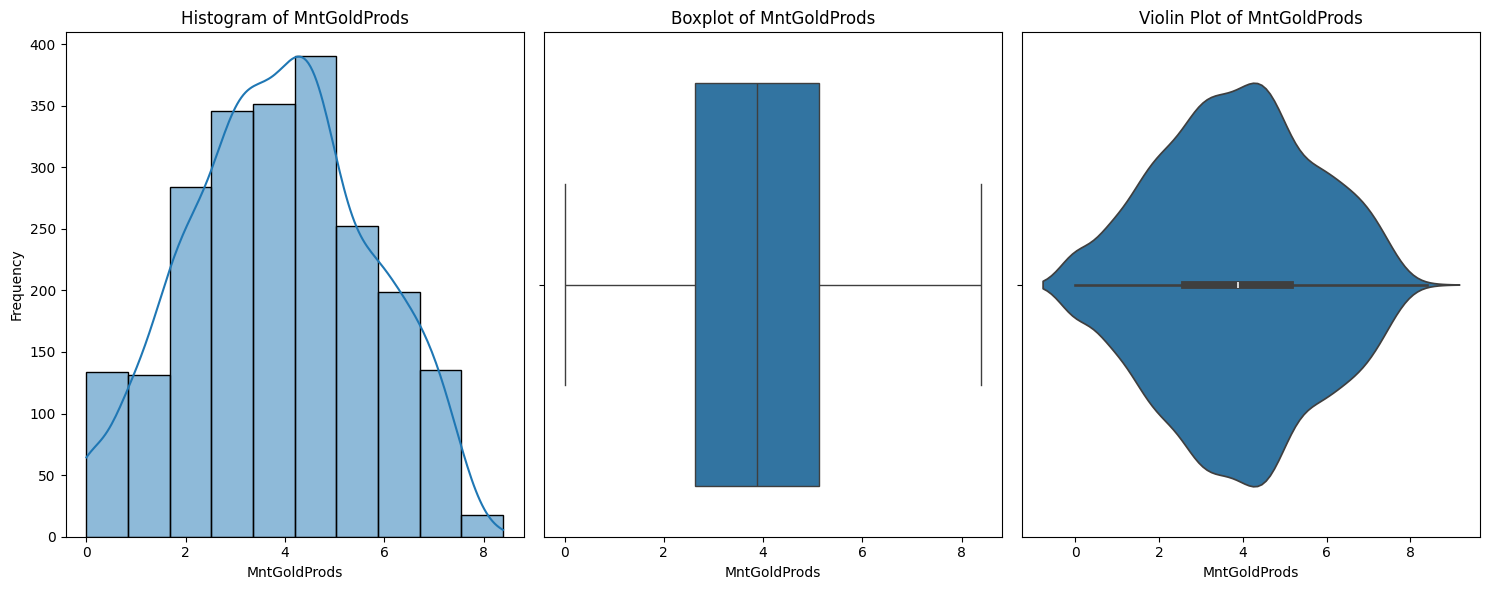

In [179]:
visualize_column(df,'MntGoldProds')

In [180]:
df['MntGoldProds'].describe()

count    2240.000000
mean        3.878042
std         1.813349
min         0.000000
25%         2.631508
50%         3.885574
75%         5.130571
max         8.390617
Name: MntGoldProds, dtype: float64

In [181]:
df['NumDealsPurchases']

0       3
1       2
2       1
3       2
4       5
       ..
2235    2
2236    7
2237    1
2238    2
2239    3
Name: NumDealsPurchases, Length: 2240, dtype: int64

In [182]:
df['NumDealsPurchases'].dtype

dtype('int64')

In [183]:
df['NumDealsPurchases'].describe()

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

In [184]:
df['NumDealsPurchases'].value_counts()

NumDealsPurchases
1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
11      5
10      5
12      4
13      3
Name: count, dtype: int64

<Axes: xlabel='NumDealsPurchases', ylabel='count'>

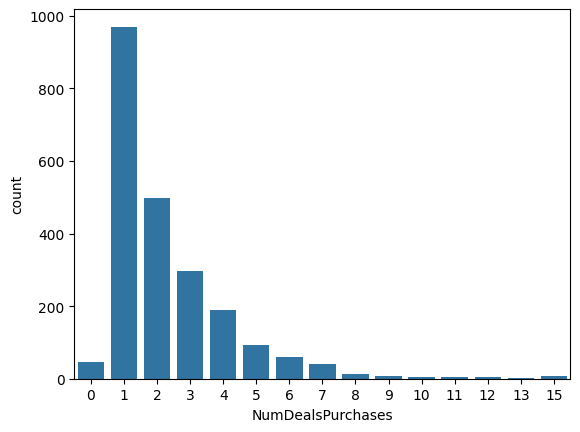

In [185]:
sns.countplot(x='NumDealsPurchases',data=df)

Most of the customers are purchasing one or 2 purchases on deals.
there are less numbers customers made more purchases during deals

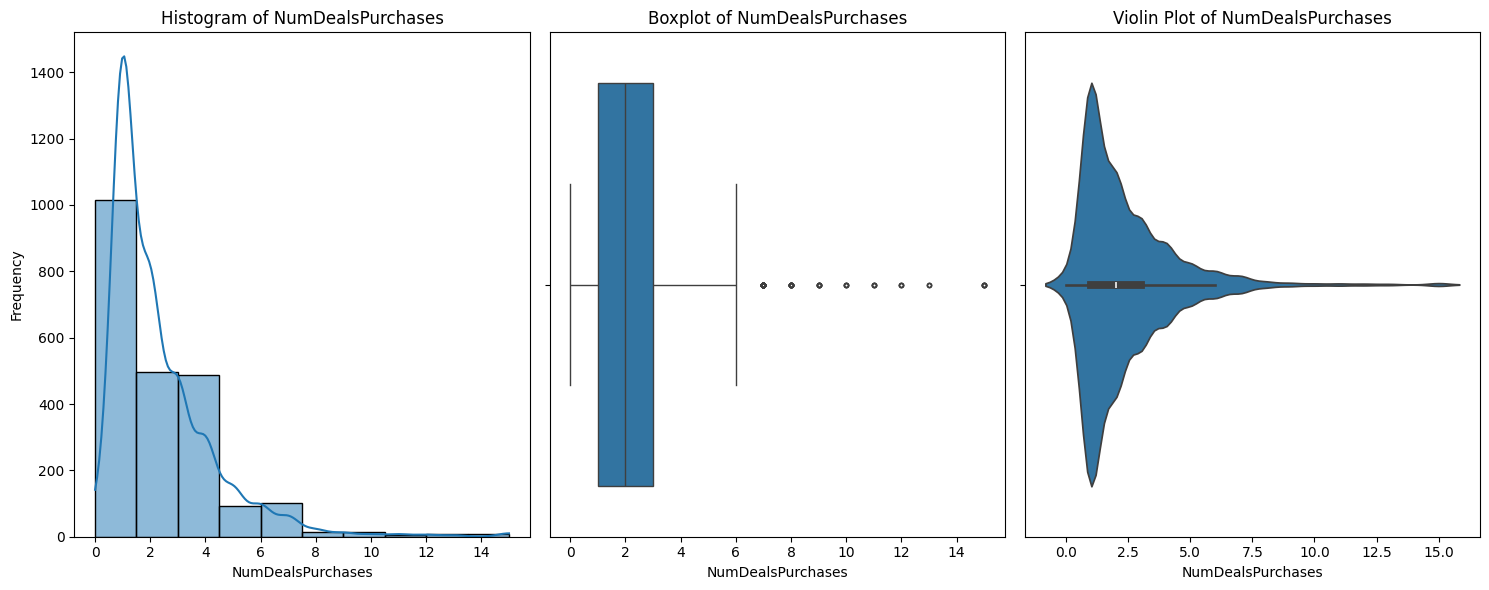

In [186]:
visualize_column(df,'NumDealsPurchases')

In [187]:
x=np.sqrt(df['NumDealsPurchases'])
x.skew()

np.float64(0.8628134648466159)

In [188]:
y=np.log1p(df['NumDealsPurchases'])
y.skew()

np.float64(0.6665067265184852)

In [189]:
df['NumDealsPurchases'].skew()

np.float64(2.4185693876889256)

In [190]:
# WE can use the Yeo-johnson for this as it has 0's
df['NumDealsPurchases'] , fitted_lambda = stats.boxcox(df['NumDealsPurchases'] + 1)  # add 1 if zeros exist as the box-cox can't handle the 0's


In [191]:
df['NumDealsPurchases'].skew()

np.float64(-9.503423717417539e-05)

In [192]:
df['NumDealsPurchases'].describe()

count    2240.000000
mean        0.808087
std         0.268276
min         0.000000
25%         0.588245
50%         0.850732
75%         1.007909
max         1.520896
Name: NumDealsPurchases, dtype: float64

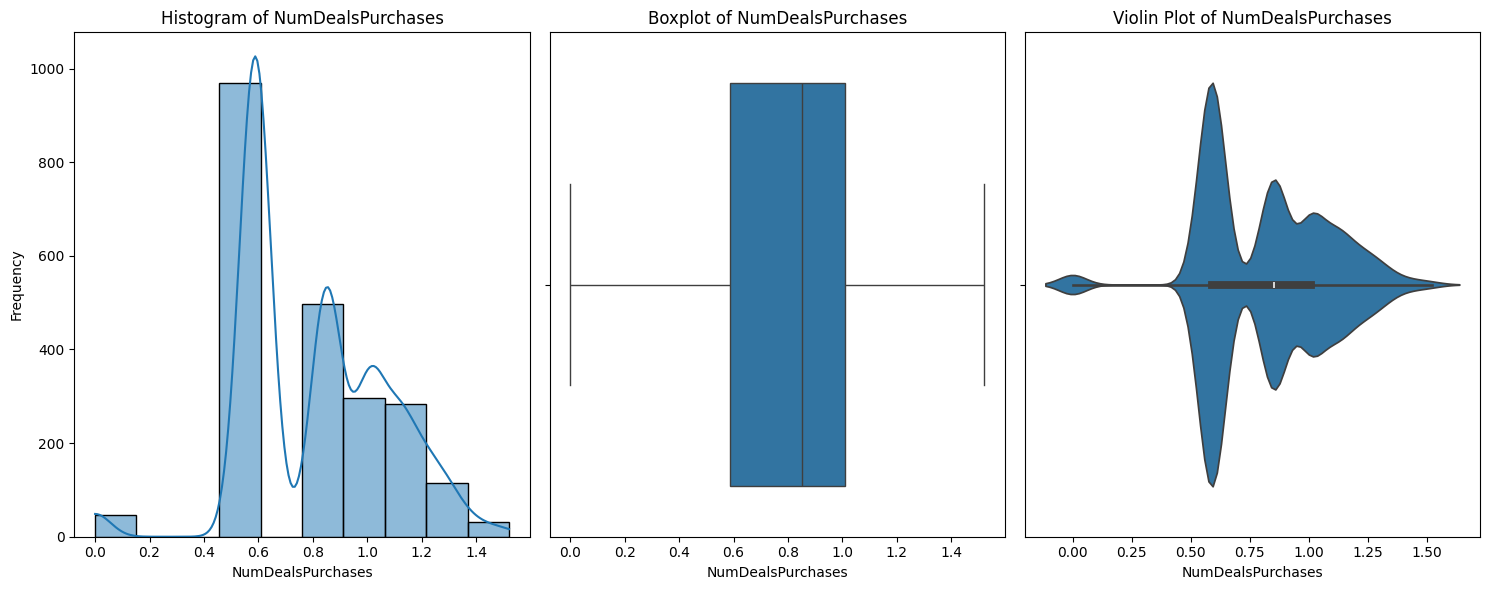

In [193]:
visualize_column(df,'NumDealsPurchases')

In [194]:
df['NumWebPurchases']

0       8
1       1
2       8
3       2
4       5
       ..
2235    9
2236    8
2237    2
2238    6
2239    3
Name: NumWebPurchases, Length: 2240, dtype: int64

In [195]:
df['NumWebPurchases'].dtype

dtype('int64')

In [196]:
df['NumWebPurchases'].describe()

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

In [197]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25])

<Axes: xlabel='NumWebPurchases', ylabel='count'>

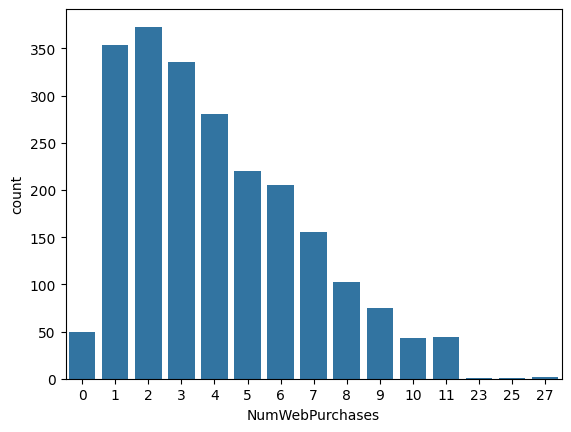

In [198]:
sns.countplot(x='NumWebPurchases',data=df)

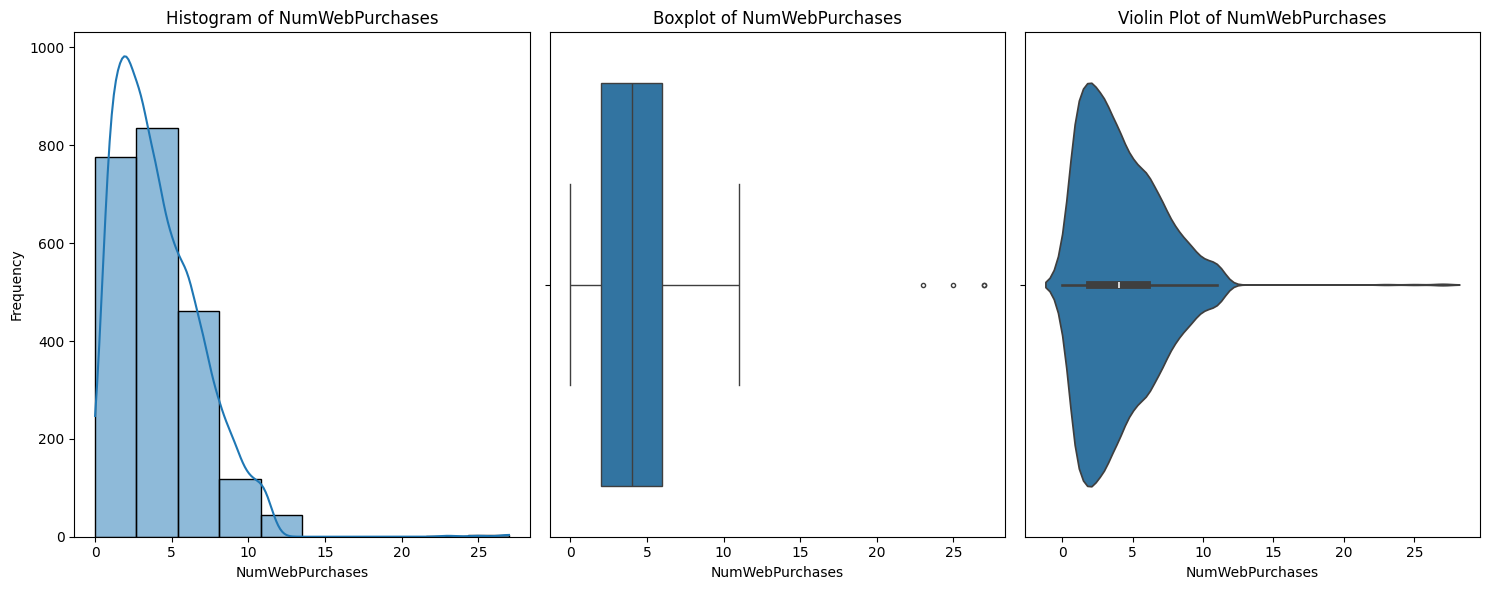

In [199]:
visualize_column(df,'NumWebPurchases')

In [200]:
df['NumWebPurchases'].skew()

np.float64(1.382794296403589)

In [201]:
df['NumWebPurchases']=np.sqrt(df['NumWebPurchases'])
df['NumWebPurchases'].skew()

np.float64(0.007850287037913389)

In [202]:
y=np.log1p(df['NumWebPurchases'])
y.skew()

np.float64(-1.0929832922628995)

In [203]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
x = pt.fit_transform(df[['NumWebPurchases']])


In [204]:
x=pd.DataFrame(x)

x.skew()

0    0.020493
dtype: float64

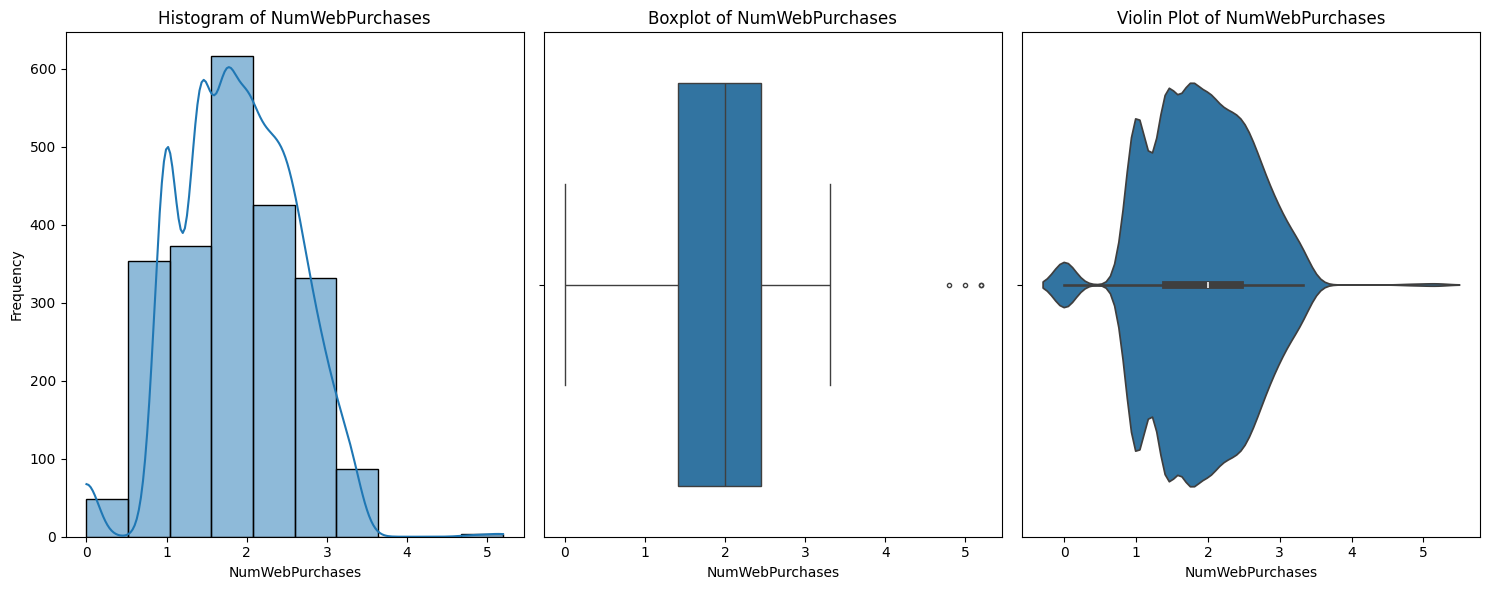

In [205]:
visualize_column(df,'NumWebPurchases')

In [206]:
df['NumWebPurchases'].describe()

count    2240.000000
mean        1.894303
std         0.704739
min         0.000000
25%         1.414214
50%         2.000000
75%         2.449490
max         5.196152
Name: NumWebPurchases, dtype: float64

In [207]:
# Number of times a customer bought through a product catalog (mail/phone order or printed list)
df['NumCatalogPurchases']

0       10
1        1
2        2
3        0
4        3
        ..
2235     3
2236     2
2237     3
2238     5
2239     1
Name: NumCatalogPurchases, Length: 2240, dtype: int64

In [208]:
df['NumCatalogPurchases'].dtype

dtype('int64')

In [209]:
df['NumCatalogPurchases'].describe()

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

In [210]:
df['NumCatalogPurchases'].value_counts()

NumCatalogPurchases
0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: count, dtype: int64

<Axes: xlabel='NumCatalogPurchases', ylabel='count'>

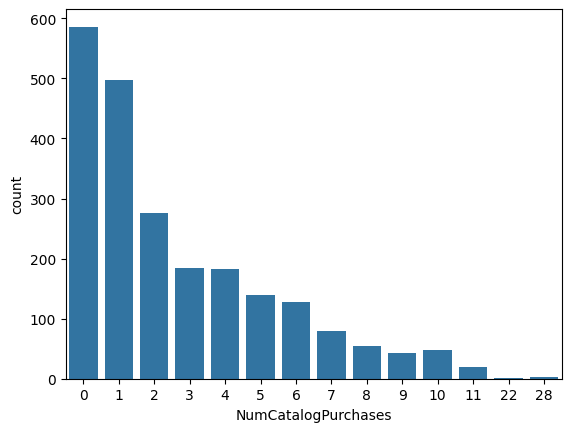

In [211]:
sns.countplot(x='NumCatalogPurchases',data=df)

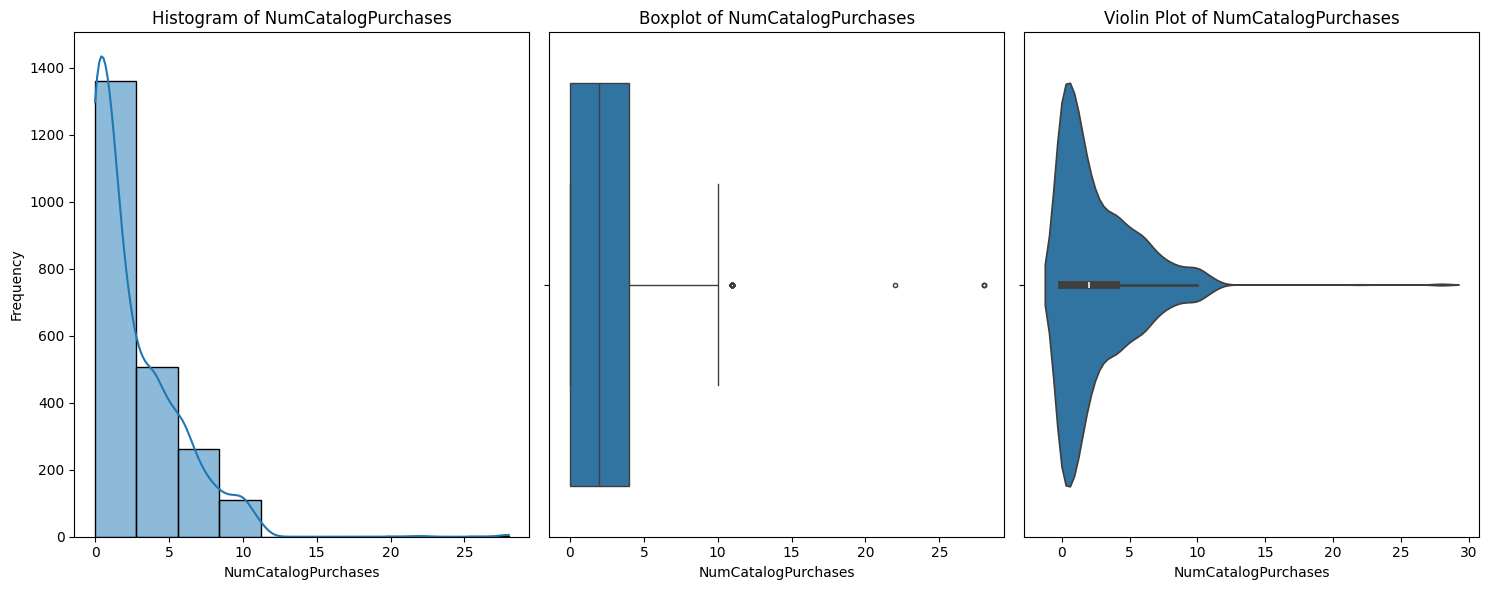

In [212]:
visualize_column(df,'NumCatalogPurchases')

In [213]:
df['NumCatalogPurchases'].skew()

np.float64(1.880988777771172)

In [214]:
x=np.sqrt(df['NumCatalogPurchases'])
x.skew()

np.float64(0.16463188640573553)

In [215]:
df['NumCatalogPurchases']=np.log1p(df['NumCatalogPurchases'])
df['NumCatalogPurchases'].skew()

np.float64(0.1322602121899251)

In [216]:
df['NumCatalogPurchases'].describe()

count    2240.000000
mean        1.005809
std         0.771292
min         0.000000
25%         0.000000
50%         1.098612
75%         1.609438
max         3.367296
Name: NumCatalogPurchases, dtype: float64

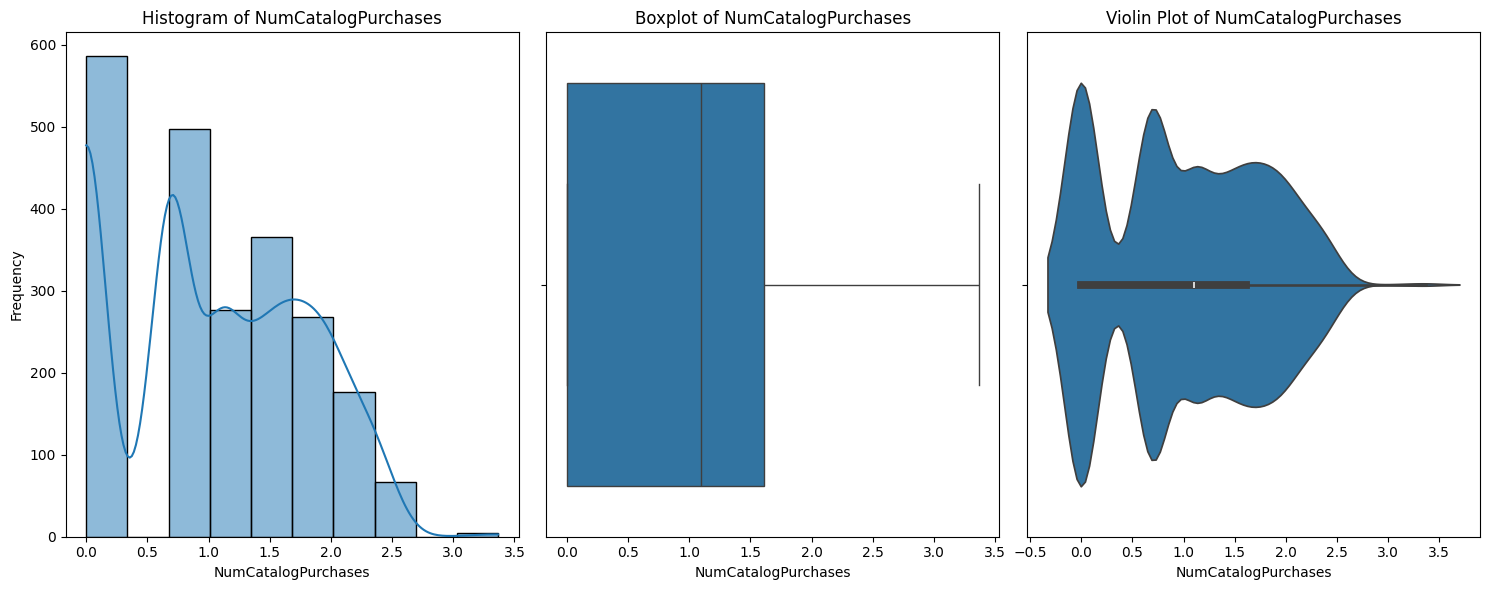

In [217]:
visualize_column(df,'NumCatalogPurchases')

In [218]:
# Number of purchases made directly in stores.
df['NumStorePurchases']

0        4
1        2
2       10
3        4
4        6
        ..
2235     4
2236     5
2237    13
2238    10
2239     4
Name: NumStorePurchases, Length: 2240, dtype: int64

In [219]:
df['NumStorePurchases'].dtype

dtype('int64')

In [220]:
df['NumStorePurchases'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: NumStorePurchases
Non-Null Count  Dtype
--------------  -----
2240 non-null   int64
dtypes: int64(1)
memory usage: 17.6 KB


In [221]:
df['NumStorePurchases'].describe()

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

<Axes: xlabel='NumStorePurchases', ylabel='count'>

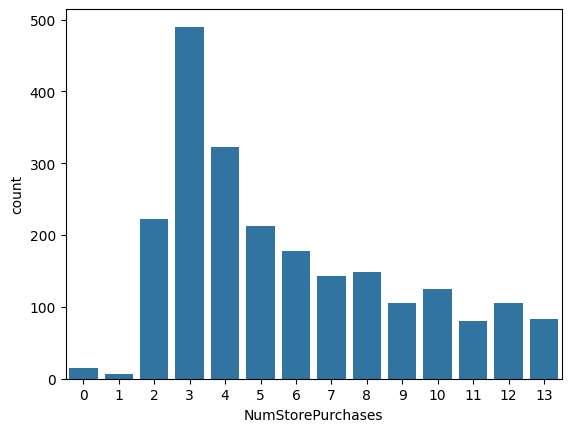

In [222]:
sns.countplot(x='NumStorePurchases',data=df)

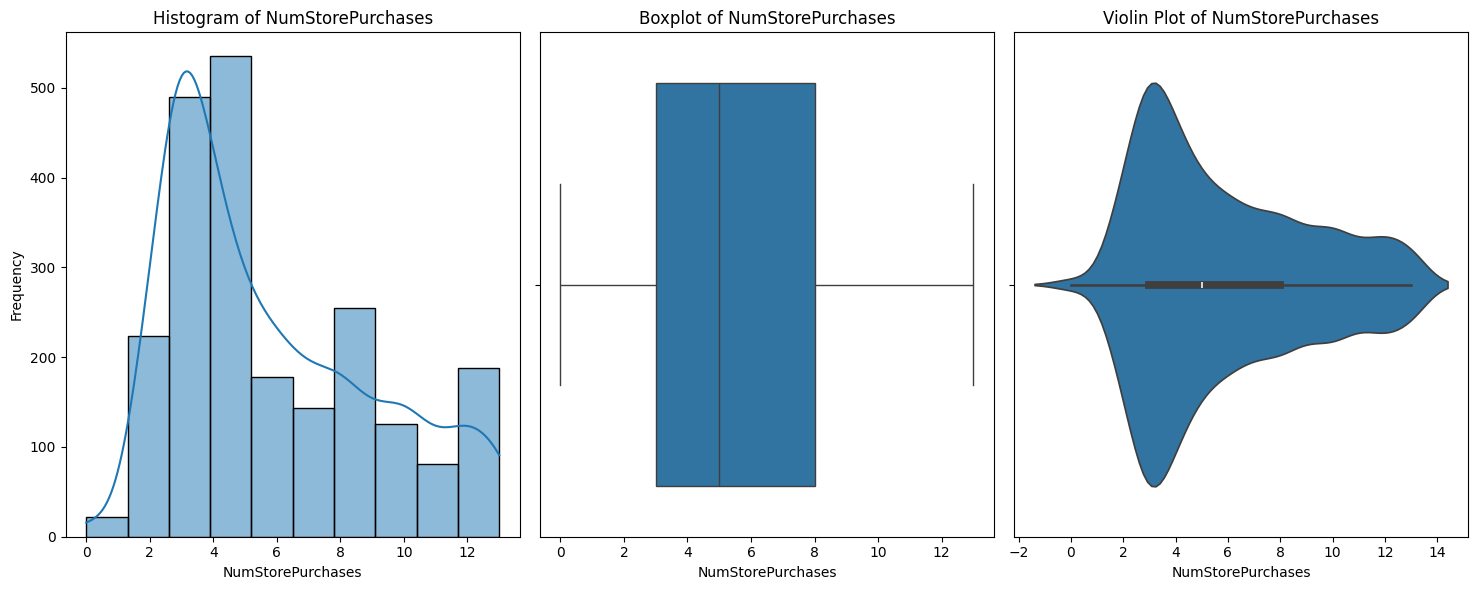

In [223]:
visualize_column(df,'NumStorePurchases')

In [224]:
df['NumStorePurchases'].skew()

np.float64(0.7022372855251121)

In [225]:
x=np.sqrt(df['NumStorePurchases'])
x.skew()

np.float64(0.14589957078178803)

In [226]:
df['NumStorePurchases']=np.log1p(df['NumStorePurchases'])
df['NumStorePurchases'].skew()

np.float64(-0.1419560223653825)

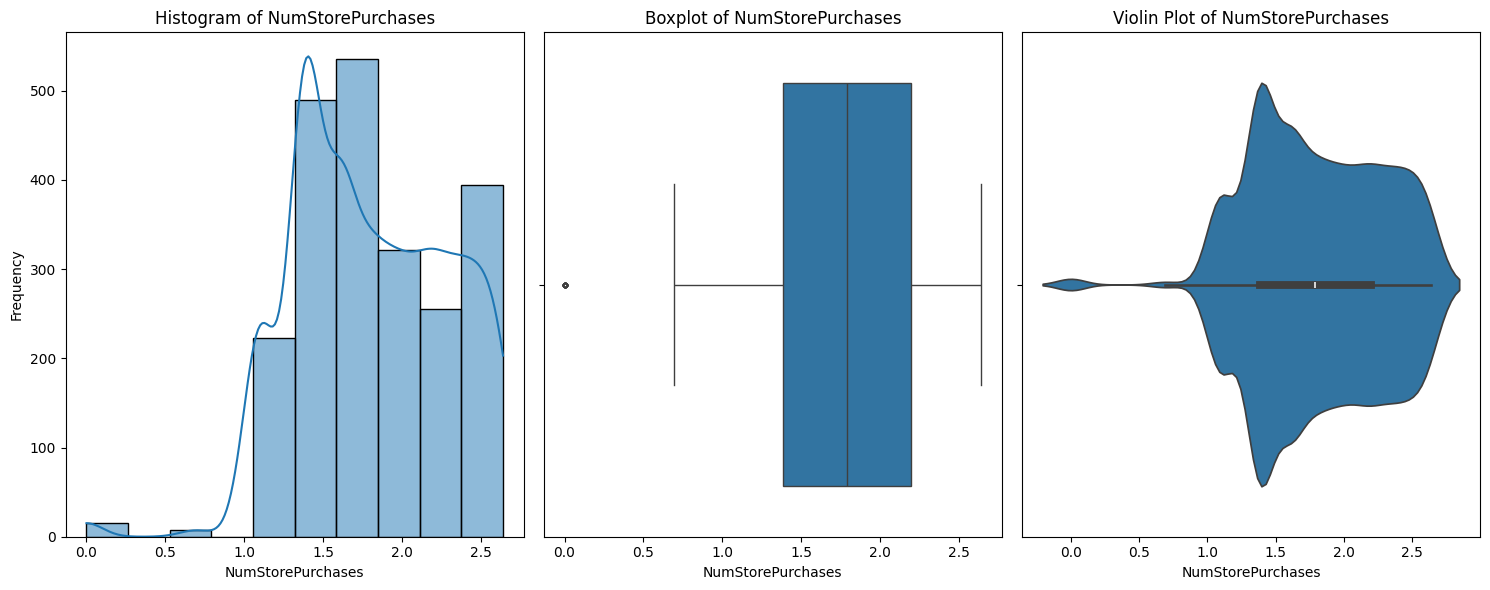

In [227]:
visualize_column(df,'NumStorePurchases')

In [228]:
df['NumStorePurchases'].describe()

count    2240.000000
mean        1.800624
std         0.486662
min         0.000000
25%         1.386294
50%         1.791759
75%         2.197225
max         2.639057
Name: NumStorePurchases, dtype: float64

In [229]:
df['NumWebVisitsMonth']

0       7
1       5
2       4
3       6
4       5
       ..
2235    5
2236    7
2237    6
2238    3
2239    7
Name: NumWebVisitsMonth, Length: 2240, dtype: int64

In [230]:
df['NumWebVisitsMonth'].dtype

dtype('int64')

In [231]:
df['NumWebVisitsMonth'].describe()

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

<Axes: xlabel='NumWebVisitsMonth', ylabel='count'>

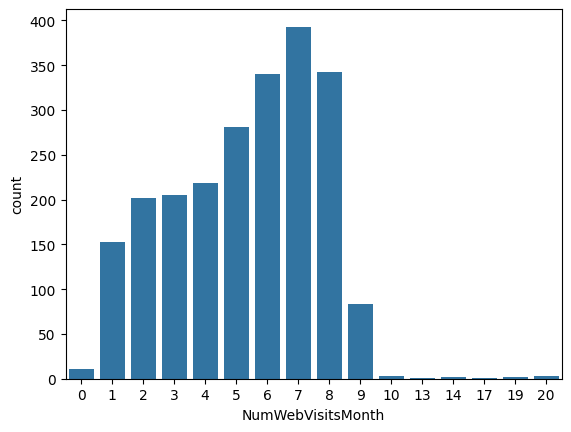

In [232]:
sns.countplot(x='NumWebVisitsMonth',data=df)

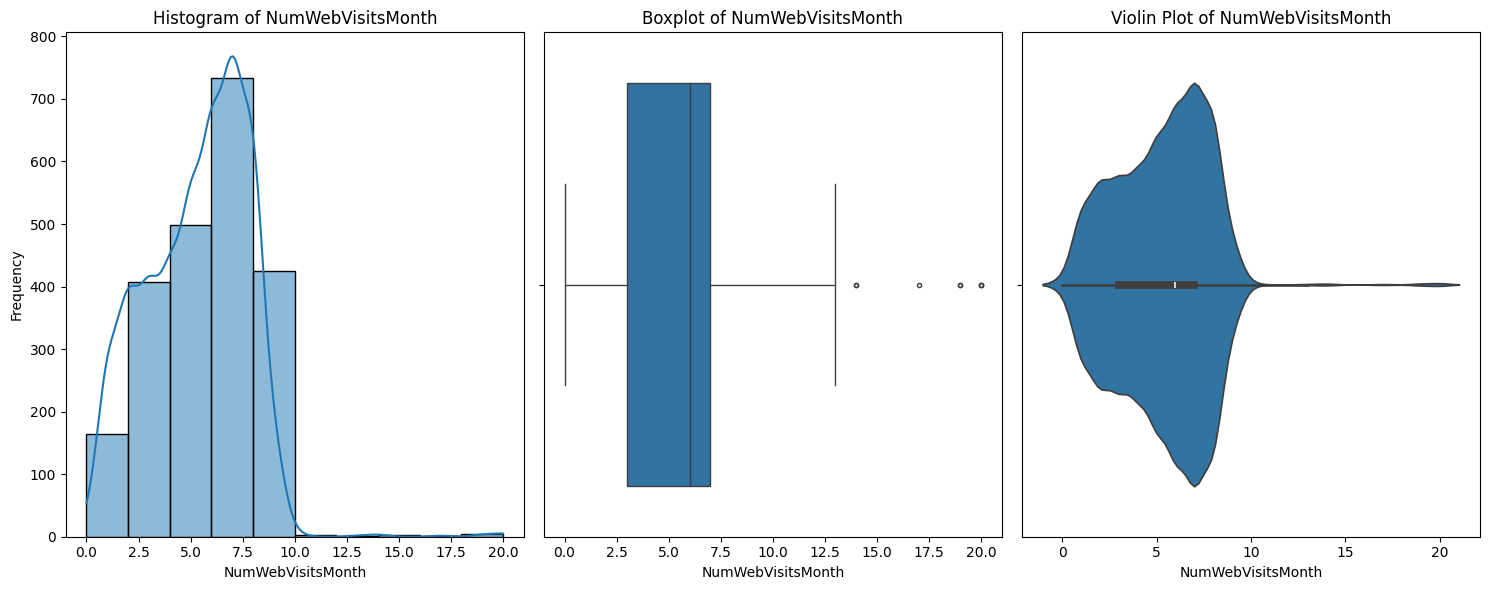

In [233]:
visualize_column(df,'NumWebVisitsMonth')

In [234]:
df['NumWebVisitsMonth'].skew()

np.float64(0.20792555676611646)

In [235]:
def transform_column_skew(df, col):
    """
    Transform a single numerical column to reduce skewness.
    Parameters:
    df : pandas.DataFrame
    col : str : column name to transform
    Returns:
    transformed_series : pd.Series
    info : dict with original skew, best skew, transformation applied
    """
    original_skew = df[col].skew()
    best_skew = original_skew
    best_transformation = 'None'
    transformed_series = df[col].copy()

    # Only transform if skew is outside [-0.5, 0.5]
    if original_skew < -0.5 or original_skew > 0.5:
        transformed_options = {}

        # 1. Square root (non-negative values only)
        if (df[col] >= 0).all():
            sqrt_transformed = np.sqrt(df[col])
            transformed_options['sqrt'] = sqrt_transformed.skew()

        # 2. log1p (log(1+x), x >= -1)
        if (df[col] >= -1).all():
            log1p_transformed = np.log1p(df[col])
            transformed_options['log1p'] = log1p_transformed.skew()

        # 3. Yeo-Johnson
        pt = PowerTransformer(method='yeo-johnson', standardize=False)
        yeo_transformed = pt.fit_transform(df[[col]])
        yeo_transformed = pd.Series(yeo_transformed.flatten(), index=df.index)
        transformed_options['yeo-johnson'] = yeo_transformed.skew()

        # Pick transformation closest to 0
        best_transformation, best_skew = min(transformed_options.items(), key=lambda x: abs(x[1]))

        # Apply the best transformation
        if best_transformation == 'sqrt':
            transformed_series = np.sqrt(df[col])
        elif best_transformation == 'log1p':
            transformed_series = np.log1p(df[col])
        elif best_transformation == 'yeo-johnson':
            transformed_series = yeo_transformed

    info = {
        'original_skew': original_skew,
        'best_skew': best_skew,
        'transformation': best_transformation
    }

    return transformed_series, info

In [236]:

# Suppose your DataFrame is df and column to transform is 'NumWebVisitsMonth'
transformed_col, report = transform_column_skew(df, 'NumWebVisitsMonth')

print(f"Original skew: {report['original_skew']:.2f}")
print(f"Best skew: {report['best_skew']:.2f}")
print(f"Transformation applied: {report['transformation']}")



Original skew: 0.21
Best skew: 0.21
Transformation applied: None


In [237]:
# Replace original column if we want
df['NumWebVisitsMonth'] = transformed_col

In [238]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [239]:
df['AcceptedCmp1']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    0
2238    0
2239    0
Name: AcceptedCmp1, Length: 2240, dtype: int64

In [240]:
df['AcceptedCmp1'].dtype

dtype('int64')

In [241]:
df['AcceptedCmp1'].value_counts()

AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64

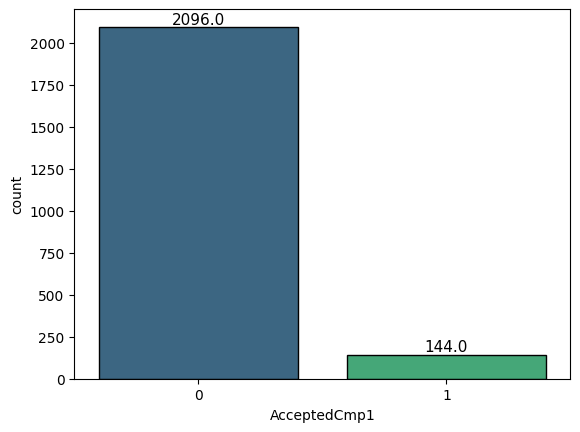

In [242]:
sns.countplot(x='AcceptedCmp1',data=df,palette='viridis',edgecolor='black')
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom', fontsize=11)
plt.show()


From the above most of the customers did not accept the first campaign offers

In [243]:
df['AcceptedCmp2']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: AcceptedCmp2, Length: 2240, dtype: int64

In [244]:
df['AcceptedCmp2'].dtype

dtype('int64')

In [245]:
df['AcceptedCmp2'].isnull().sum()

np.int64(0)

In [246]:
df['AcceptedCmp2'].value_counts()

AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64

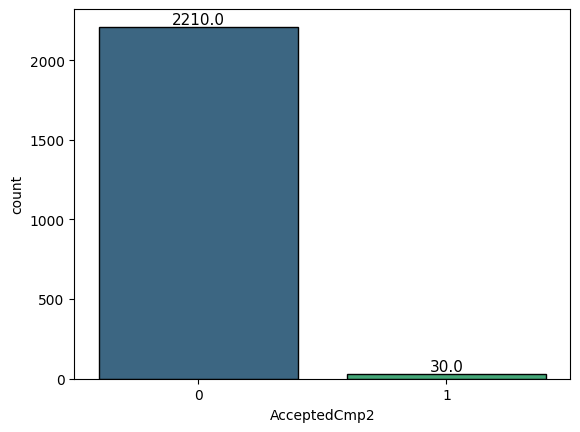

In [247]:
sns.countplot(x='AcceptedCmp2',data=df,palette='viridis',edgecolor='black')
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom', fontsize=11)
plt.show()


From the above most of the customers did not accept the first campaign

In [248]:
df['AcceptedCmp3']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: AcceptedCmp3, Length: 2240, dtype: int64

In [249]:
df['AcceptedCmp3'].dtype

dtype('int64')

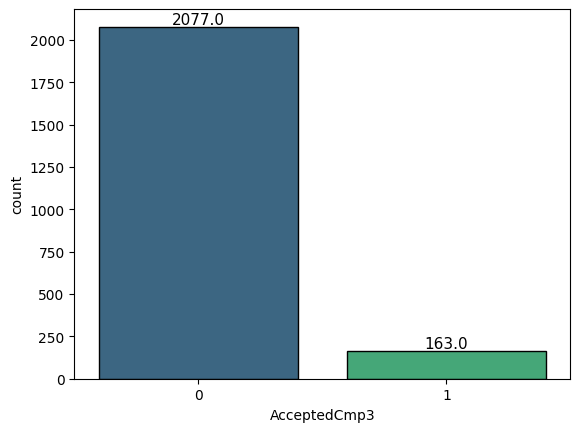

In [250]:
sns.countplot(x='AcceptedCmp3',data=df,palette='viridis',edgecolor='black')
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom', fontsize=11)
plt.show()


From the above most of the customers did not accept the first campaign




In [251]:
df['AcceptedCmp4']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: AcceptedCmp4, Length: 2240, dtype: int64

In [252]:
df['AcceptedCmp4'].dtype

dtype('int64')

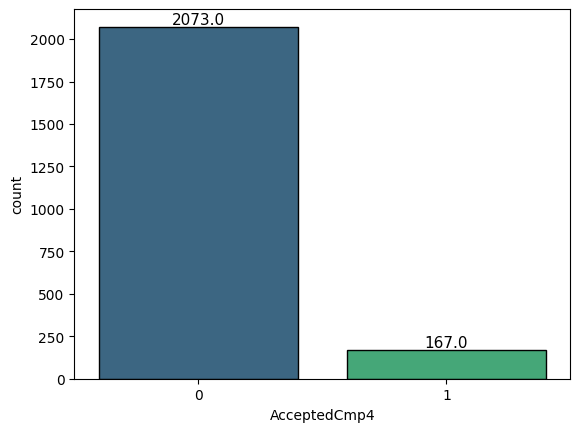

In [253]:
sns.countplot(x='AcceptedCmp4',data=df,palette='viridis',edgecolor='black')
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom', fontsize=11)
plt.show()


From the above most of the customers did not accept the first campaign


In [254]:
df['AcceptedCmp5']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: AcceptedCmp5, Length: 2240, dtype: int64

In [255]:
df['AcceptedCmp5'].dtype

dtype('int64')

In [256]:
df['AcceptedCmp5'].describe()

count    2240.000000
mean        0.072768
std         0.259813
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp5, dtype: float64

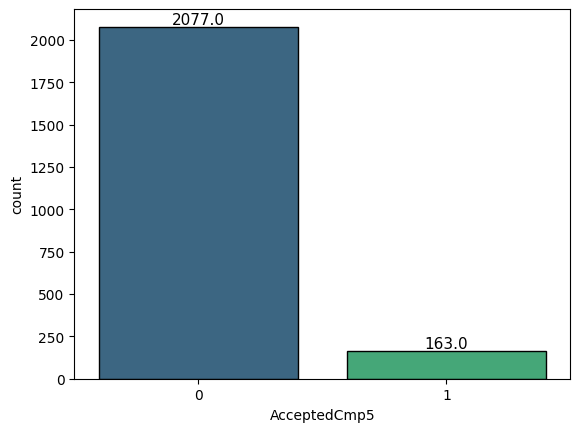

In [257]:
sns.countplot(x='AcceptedCmp5',data=df,palette='viridis',edgecolor='black')
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom', fontsize=11)
plt.show()


From the above most of the customers did not accept the first campaign


** From All the 5 campaigns the second campaign has less  acceptences of the offer and mostly cutomers did not accept the offers during campaign **

In [258]:
# Response to the most recent campaign (1 = accepted, 0 = not accepted). This is often the target variable in prediction tasks.
df['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [259]:
df['Response'].dtype

dtype('int64')

In [260]:
df['Response'].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

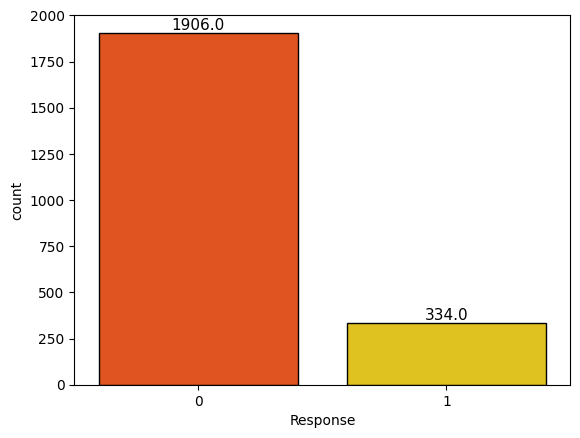

In [261]:
sns.countplot(x='Response',data=df,palette=['#FF4500','#FFD700'],edgecolor='black')
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom', fontsize=11)
plt.show()


From the recent campaign the customer acceptence of offer is increased by double this means the recent campaign attracts the customers withing their needs a lit bit than other campaigns .


In [262]:
# 1 if the customer has complained in the last 2 years, 0 otherwise.
df['Complain']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Complain, Length: 2240, dtype: int64

In [263]:
df['Complain'].dtype

dtype('int64')

In [264]:
df['Complain'].value_counts()

Complain
0    2219
1      21
Name: count, dtype: int64

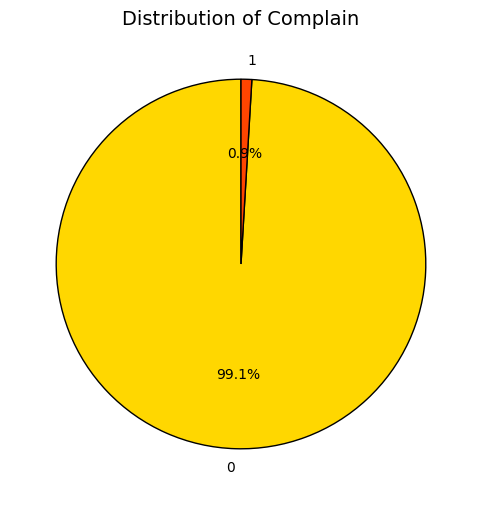

In [265]:
counts = df['Complain'].value_counts()

# Labels
labels = counts.index.astype(str)  # '0' and '1'
# Colors (yellow for 0, red for 1)
colors = ['#FFD700', '#FF4500']  # yellow, red
# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',  # show percentage
    startangle=90,      # rotate start
    colors=colors,
    wedgeprops={'edgecolor':'black'}  # border around slices
)

plt.title('Distribution of Complain', fontsize=14)
plt.show()

From the above there are less than 1% of complaints have been raised this maeans the marketting is going well and but we have to check the complaints nce if there are any major complaints in them.

Any way the marketing was going well


In [266]:
# Cost of a contact to the company .
df['Z_CostContact']

0       3
1       3
2       3
3       3
4       3
       ..
2235    3
2236    3
2237    3
2238    3
2239    3
Name: Z_CostContact, Length: 2240, dtype: int64

In [267]:
df['Z_CostContact'].dtype

dtype('int64')

In [268]:
df['Z_CostContact'].value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [269]:
df['Z_CostContact'].unique()

array([3])

This column has all values are same as it is has contact cost for all coustomers as 3  so we can drop this column during feature engineering

In [270]:
# Revenue from a single sale contact
df['Z_Revenue']

0       11
1       11
2       11
3       11
4       11
        ..
2235    11
2236    11
2237    11
2238    11
2239    11
Name: Z_Revenue, Length: 2240, dtype: int64

In [271]:
df['Z_Revenue'].dtype

dtype('int64')

In [272]:
df['Z_Revenue'].value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

<Axes: xlabel='Z_Revenue', ylabel='count'>

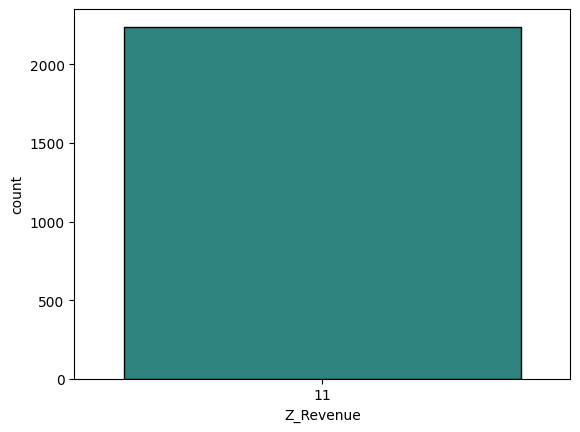

In [273]:
sns.countplot(x='Z_Revenue',data=df,palette='viridis',edgecolor='black')

The Revenue column also have same value as 11 as it the company gets revenue from the each customer is 11.
So we can drop it during the feature engineering or now

In [274]:
# Dropping the columns Z_CostContact and Z_Revenue  and Id Which have unique values
df.drop(columns={'ID','Z_CostContact','Z_Revenue'},inplace=True)

# Bivariate analysis

In [275]:
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency   MntWines  MntFruits  ...  NumStorePurchases  \
0  2012-09-04       58  25.199206   4.488636  ...           1.609438   
1  2014-03-08       38   3.316625   0.693147  ...           1.098612   
2  2013-08-21       26  20.639767   3.912023  ...           2.397895   
3  2014-02-10       26   3.316625   1.609438  ...           1.609438   
4  2014-01-19       94  13.152946   3.784190  ...           1.945910   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response   Age  
0             0         0         1  68.0  
1             0         0         0  71.0  
2             0         0         0  60.0  
3             0         0         0  41.0  
4             0         0         0  44.0  

[5 rows x 27 columns]

In [276]:
df.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                      float64
MntFruits                     float64
MntMeatProducts               float64
MntFishProducts               float64
MntSweetProducts              float64
MntGoldProds                  float64
NumDealsPurchases             float64
NumWebPurchases               float64
NumCatalogPurchases           float64
NumStorePurchases             float64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response                        int64
Age                           float64
dtype: object

In [277]:
df.corr(numeric_only=True)

Year_Birth    Income   Kidhome  Teenhome   Recency  \
Year_Birth             1.000000 -0.196396  0.230176 -0.352111 -0.019871   
Income                -0.196396  1.000000 -0.507830  0.033096  0.005525   
Kidhome                0.230176 -0.507830  1.000000 -0.036133  0.008827   
Teenhome              -0.352111  0.033096 -0.036133  1.000000  0.016198   
Recency               -0.019871  0.005525  0.008827  0.016198  1.000000   
MntWines              -0.201172  0.759327 -0.558800  0.070253  0.015766   
MntFruits             -0.022374  0.537831 -0.439815 -0.195981  0.023705   
MntMeatProducts       -0.103270  0.767408 -0.533952 -0.116457  0.029396   
MntFishProducts       -0.024695  0.519244 -0.432642 -0.227258  0.016116   
MntSweetProducts       0.005704  0.525314 -0.430628 -0.194795  0.023219   
MntGoldProds          -0.061645  0.435288 -0.407066 -0.022286  0.019649   
NumDealsPurchases     -0.063453 -0.216666  0.253236  0.450301  0.009062   
NumWebPurchases       -0.148548  0.482316 -0.379013  0.140174 -0.000739   
NumCatalogPurchases   -0.167310  0.744334 -0.576115 -0.043348  0.030076   
NumStorePurchases     -0.142504  0.628523 -0.509435  0.072368  0.007471   
NumWebVisitsMonth      0.121139 -0.644702  0.447846  0.134884 -0.021445   
AcceptedCmp3           0.061774 -0.015682  0.014674 -0.042677 -0.032991   
AcceptedCmp4          -0.060510  0.215781 -0.161600  0.038886  0.018826   
AcceptedCmp5           0.007123  0.394485 -0.205634 -0.191050  0.000129   
AcceptedCmp1          -0.005930  0.323641 -0.172339 -0.140090 -0.019283   
AcceptedCmp2          -0.006539  0.103492 -0.081716 -0.015605 -0.001781   
Complain              -0.030128 -0.030665  0.040207  0.003138  0.013231   
Response               0.021325  0.160063 -0.080008 -0.154446 -0.198437   
Age                   -0.994415  0.198404 -0.233327  0.359414  0.020039   

                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Year_Birth          -0.201172  -0.022374        -0.103270        -0.024695   
Income               0.759327   0.537831         0.767408         0.519244   
Kidhome             -0.558800  -0.439815        -0.533952        -0.432642   
Teenhome             0.070253  -0.195981        -0.116457        -0.227258   
Recency              0.015766   0.023705         0.029396         0.016116   
MntWines             1.000000   0.509427         0.797707         0.500076   
MntFruits            0.509427   1.000000         0.704529         0.693656   
MntMeatProducts      0.797707   0.704529         1.000000         0.704935   
MntFishProducts      0.500076   0.693656         0.704935         1.000000   
MntSweetProducts     0.499407   0.686639         0.685692         0.689732   
MntGoldProds         0.535921   0.552248         0.612191         0.542271   
NumDealsPurchases    0.016833  -0.115454        -0.019028        -0.117441   
NumWebPurchases      0.677690   0.441642         0.641374         0.430035   
NumCatalogPurchases  0.804419   0.622121         0.843549         0.632269   
NumStorePurchases    0.755659   0.559045         0.741822         0.548690   
NumWebVisitsMonth   -0.375448  -0.442521        -0.501309        -0.456059   
AcceptedCmp3         0.045345   0.009437         0.007909        -0.025366   
AcceptedCmp4         0.338433   0.027153         0.143588        -0.002245   
AcceptedCmp5         0.409125   0.236199         0.326735         0.210131   
AcceptedCmp1         0.327532   0.178631         0.280686         0.205181   
AcceptedCmp2         0.163862   0.000561         0.061465        -0.005858   
Complain            -0.039319  -0.011832        -0.027746        -0.030175   
Response             0.219715   0.148634         0.222175         0.112779   
Age                  0.206119   0.022931         0.107076         0.024280   

                     MntSweetProducts  ...  NumStorePurchases  \
Year_Birth                   0.005704  ...          -0.142504   
Income                       0.525314  ...           0.628523   

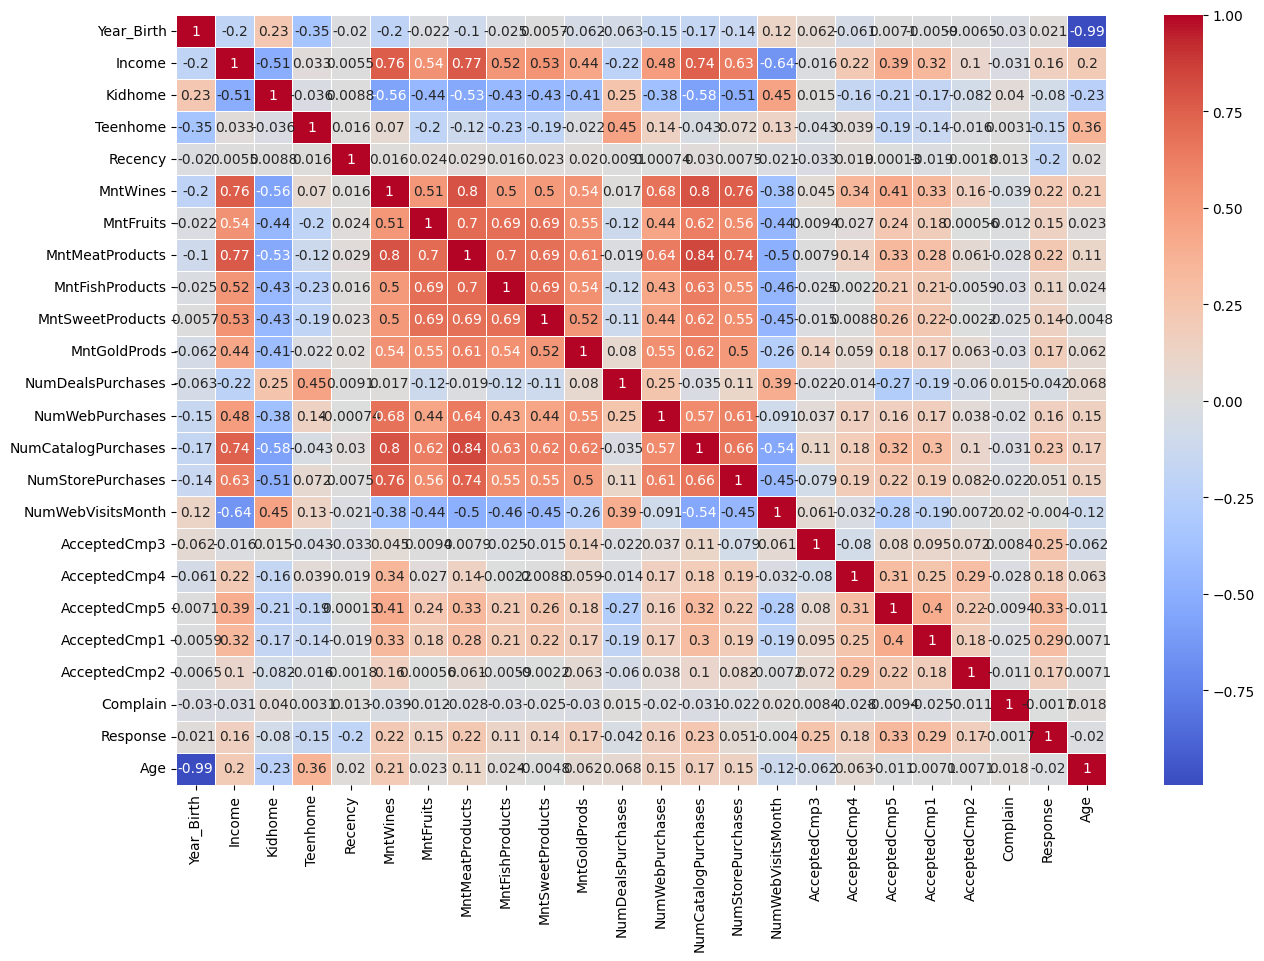

In [278]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',linewidth=0.5)
plt.show()

From the above correlation heatmap we can find some Insights are:
* The customer with more income are mostly buying the Meat and Wines aand they prefer purchasing through catalog
* Most income Customers moderately buys the Fishes,sweets ,gold And Moderately uses the purchasing via store and web.
* And The Income is -vely correlated with Numofwebvistit.
* The kids home are mostly the more the kids the less the purchase amount on the wines ,meat, fruits ,fish ,sweet and the custoomers with more kids are not making purchases through the web,catalog,store.But they preffer deal purchases but in less.
* The Customers who purchases the meat are most like buying the wines. And The both Meat and Wines are most likely brought throgh the catalog mean The more catalog purchases the more amount of purchases on meat and wines.
* The wines and meat purchases are more in store and the web,This means lots of customers are purchasing meat and wines and fruits in every purchase platform.
* The more the webVisitmonth the less the purchase of the fruits,sweet,gold,wines,and meat.They mostly purchasing during the deals (offers)
* The more customer with more kid are mostly buying in the deals(offers)
* And Some are like storepurchases are moderately +vely correlated with webpurchases,catlogpurchases.

In [279]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age'],
      dtype='object')

In [280]:
df['Total_Purchases']=df['MntFishProducts']+df['MntFruits']+df['MntGoldProds']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntWines']

In [281]:
data_Original['Total_Purchases']=data_Original['MntFishProducts']+data_Original['MntFruits']+data_Original['MntGoldProds']+data_Original['MntMeatProducts']+data_Original['MntSweetProducts']+data_Original['MntWines']

In [282]:
df['Total_original']=data_Original['Total_Purchases']

In [283]:
df['Total_Purchases'].corr(df['Total_original'])

np.float64(0.9340383168197088)

<Axes: xlabel='Total_Purchases', ylabel='Total_original'>

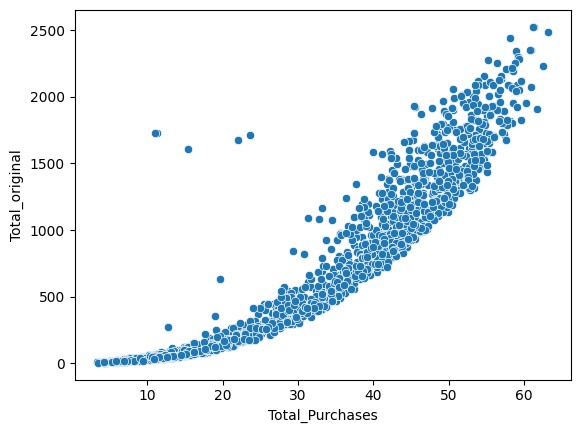

In [284]:
sns.scatterplot(x='Total_Purchases',y='Total_original',data=df)

In [285]:
df['Total_Num_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

In [286]:
r=df['Total_Num_Purchases'].corr(df['Total_Purchases'])
r

np.float64(0.9180519959082026)

In [287]:
#VIF

In [288]:
vif=1/(1-r**2)
vif

np.float64(6.3621110205510165)

In [289]:
df['Purchases_Ratio'] = df['Total_Purchases'] / (df['Total_Num_Purchases'] + 1)


In [290]:
df['Purchases_Ratio']

0       6.570900
1       2.617515
2       5.720871
3       3.415242
4       4.895821
          ...   
2235    7.407904
2236    3.881485
2237    7.664552
2238    5.574640
2239    4.006850
Name: Purchases_Ratio, Length: 2240, dtype: float64

In [291]:
df['Purchases_Ratio'].describe()

count    2240.000000
mean        4.802444
std         1.577801
min         1.077546
25%         3.571804
50%         4.762094
75%         5.784507
max        13.039968
Name: Purchases_Ratio, dtype: float64

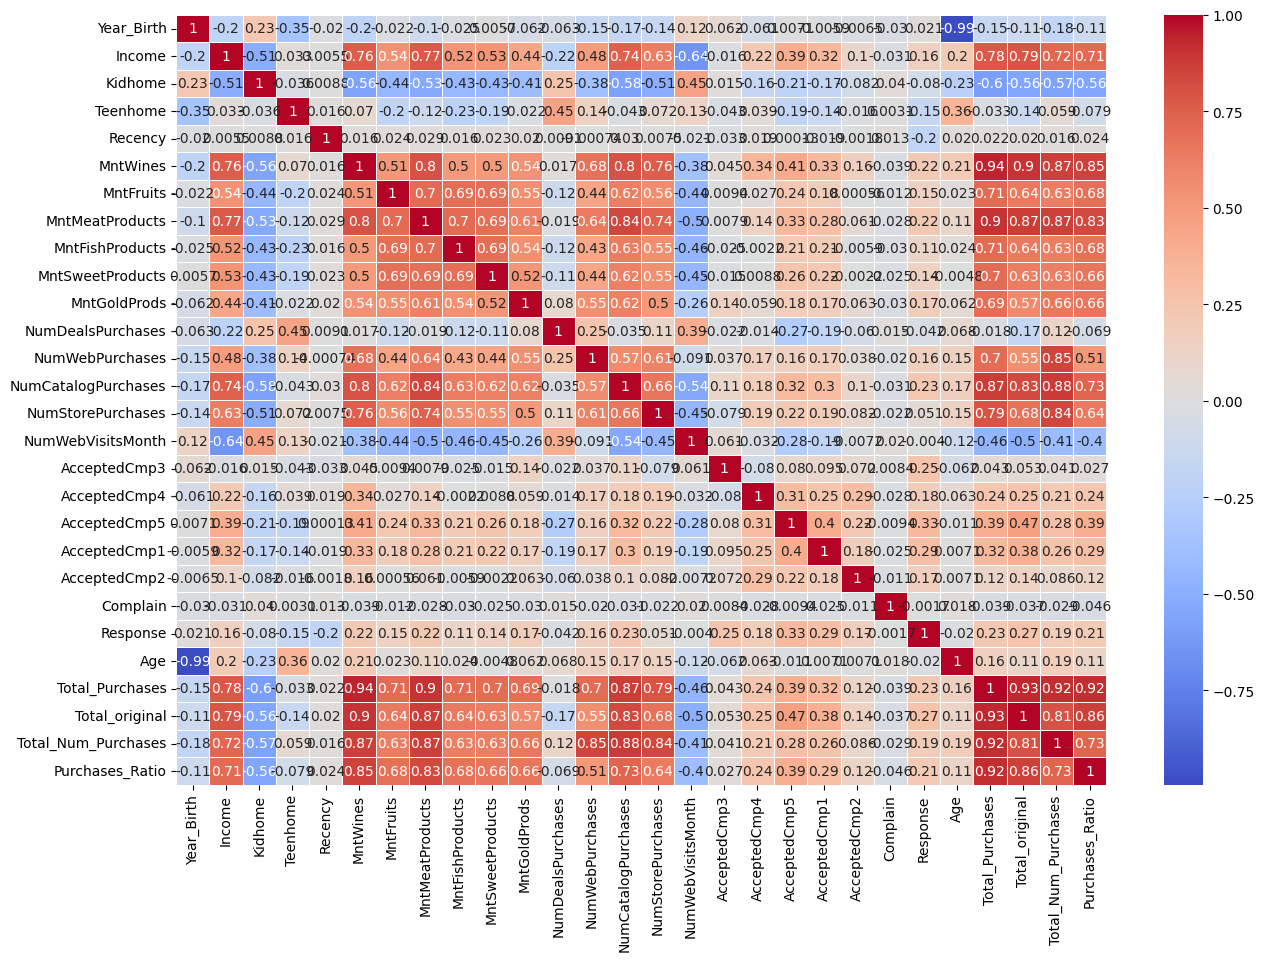

In [292]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',linewidth=0.5)
plt.show()

In [293]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [294]:
# Define a function for FamilySize
def calculate_family_size(row):
    base = row['Kidhome'] + row['Teenhome']
    if row['Marital_Status'] in ['Single','Divorced','Widow']:
        return base + 1
    elif row['Marital_Status'] in ['Together', 'Married']:
        return base + 2
# Apply function row-wise
df['FamilySize'] = df.apply(calculate_family_size, axis=1)
# Check
print(df[['Kidhome','Teenhome','Marital_Status','FamilySize']].head())

   Kidhome  Teenhome Marital_Status  FamilySize
0        0         0         Single           1
1        1         1         Single           3
2        0         0       Together           2
3        1         0       Together           3
4        1         0        Married           3


In [295]:
df['FamilySize'].describe()

count    2240.000000
mean        2.596875
std         0.905785
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: FamilySize, dtype: float64

In [296]:
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency   MntWines  MntFruits  ...  AcceptedCmp1  AcceptedCmp2  \
0  2012-09-04       58  25.199206   4.488636  ...             0             0   
1  2014-03-08       38   3.316625   0.693147  ...             0             0   
2  2013-08-21       26  20.639767   3.912023  ...             0             0   
3  2014-02-10       26   3.316625   1.609438  ...             0             0   
4  2014-01-19       94  13.152946   3.784190  ...             0             0   

   Complain  Response   Age  Total_Purchases  Total_original  \
0         0         1  68.0        51.488000            1617   
1         0         0  71.0         9.924989              27   
2         0         0  60.0        41.905003             776   
3         0         0  41.0        13.741742              53   
4         0         0  44.0        32.157086             422   

   Total_Num_Purchases  Purchases_Ratio  FamilySize  
0             6.835760         6.570900           1  
1             2.791759         2.617515           3  
2             6.324935         5.720871           2  
3             3.023651         3.415242           3  
4             5.568272         4.895821           3  

[5 rows x 32 columns]

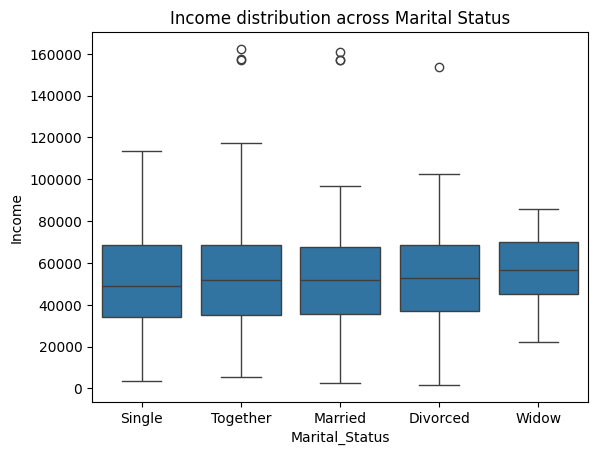

In [297]:
sns.boxplot(x='Marital_Status', y='Income', data=df)
plt.title("Income distribution across Marital Status")
plt.show()


Here almost martial status has the same distribution of income for every one but the together and married have the highest income among all,and there are less number of widows in the data.

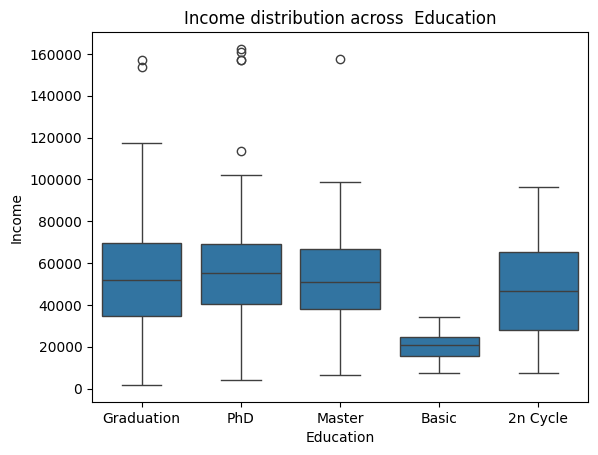

In [298]:
sns.boxplot(x='Education', y='Income', data=df)
plt.title("Income distribution across  Education")
plt.show()

From the above the PHD and graduates have more income and most of the salaries are range from 20000 to 700000 and the Basic Education has lowest salary.

<Axes: xlabel='Marital_Status'>

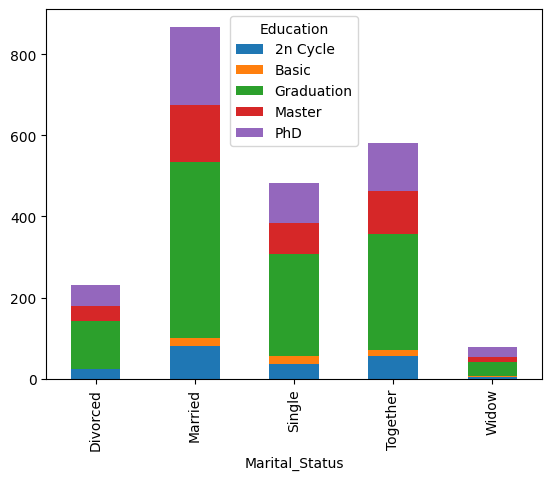

In [299]:
cr=pd.crosstab(df['Marital_Status'],df['Education'])
cr.plot(kind='bar',stacked='True')

From the above chart we can fid that are more Graduates in every martial status married

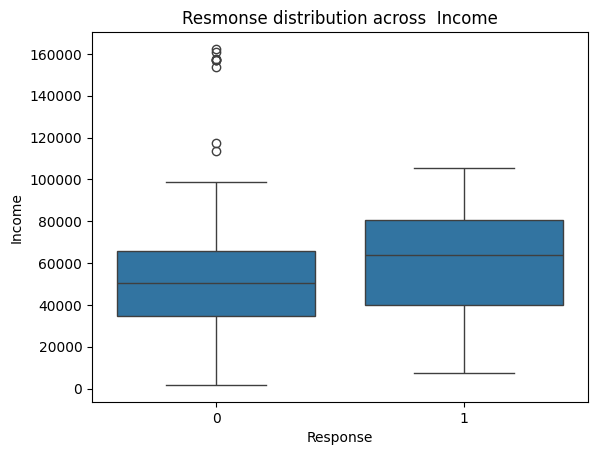

In [300]:
sns.boxplot(x='Response', y='Income', data=df)
plt.title("Resmonse distribution across  Income")
plt.show()

From this the income ranges from 50 to 80k are mostly gave +ve Response and the income from 20 to 60 k are mostly have -ve response and the customers with high income almost decline the campaign

In [301]:

ttest_ind(df[df['Response']==1]['Income'],df[df['Response']==0]['Income'])

TtestResult(statistic=np.float64(7.671066884107596), pvalue=np.float64(2.526989357668166e-14), df=np.float64(2238.0))

Here the p<0.05 so these two features are significant,where these two are statastically different,means they carry different information.

In [302]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month
df['Day'] = df['Dt_Customer'].dt.day
df['DayOfWeek'] = df['Dt_Customer'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['Customer_Since_Days'] = (pd.Timestamp.today() - df['Dt_Customer']).dt.days

In [303]:
df[['Customer_Since_Days', 'Age','Income','Purchases_Ratio']].corr()


Customer_Since_Days       Age    Income  Purchases_Ratio
Customer_Since_Days             1.000000 -0.019615 -0.024060         0.195613
Age                            -0.019615  1.000000  0.198404         0.113075
Income                         -0.024060  0.198404  1.000000         0.710763
Purchases_Ratio                 0.195613  0.113075  0.710763         1.000000

<Axes: xlabel='Customer_Since_Days', ylabel='Income'>

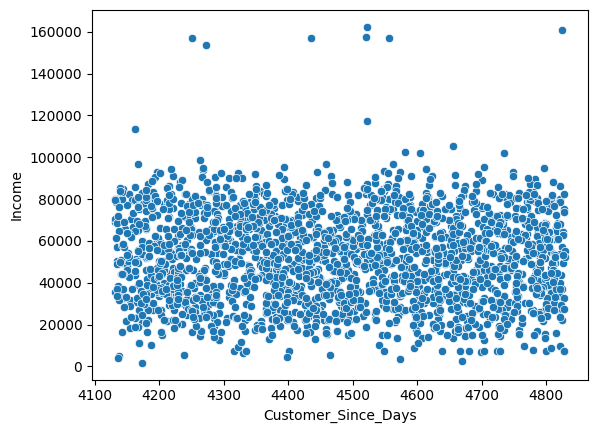

In [304]:
sns.scatterplot(x='Customer_Since_Days', y='Income', data=df)

In [305]:
# Count number of customers per year
customers_per_year = df['Year'].value_counts().sort_index().reset_index()
customers_per_year.columns = ['Year', 'Num_Customers']
# Display the result
print(customers_per_year)

   Year  Num_Customers
0  2012            494
1  2013           1189
2  2014            557


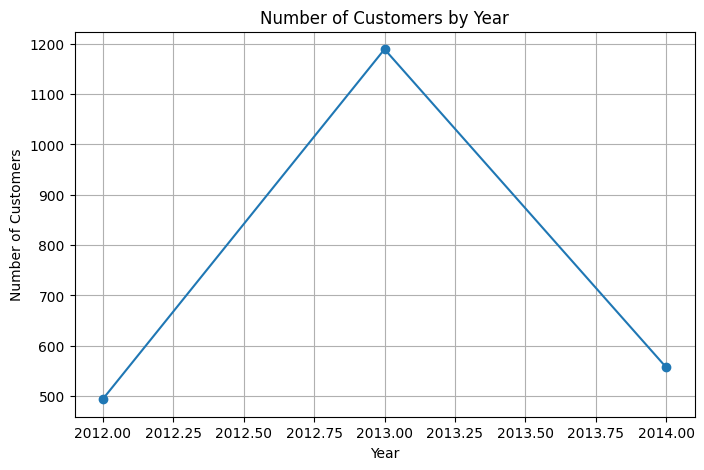

In [306]:
# Plot the trend
plt.figure(figsize=(8,5))
plt.plot(customers_per_year['Year'], customers_per_year['Num_Customers'], marker='o')
plt.title('Number of Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

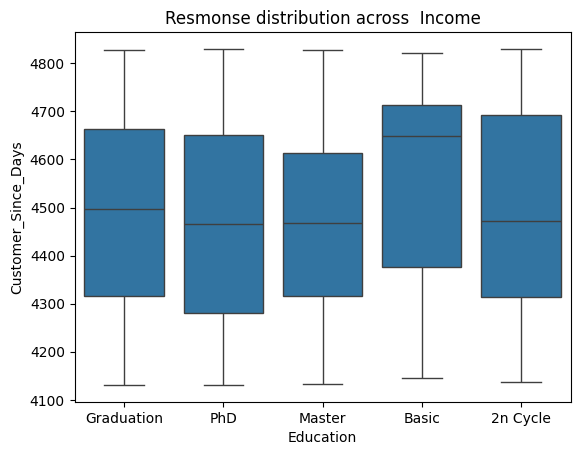

In [307]:
sns.boxplot(x='Education', y='Customer_Since_Days', data=df)
plt.title("Resmonse distribution across  Income")
plt.show()

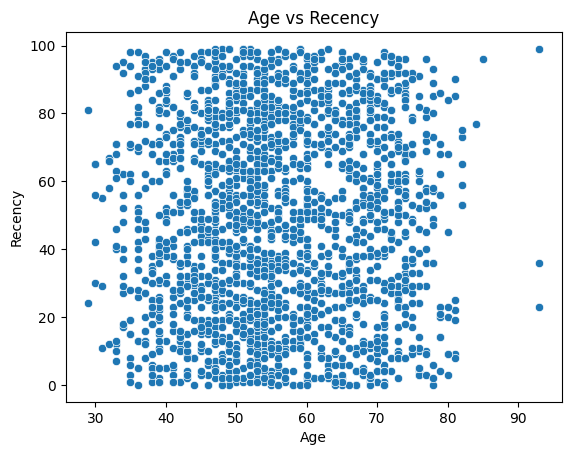

In [328]:
# Age vs Recency
sns.scatterplot(x='Age', y='Recency', data=df)
plt.title('Age vs Recency')
plt.show()

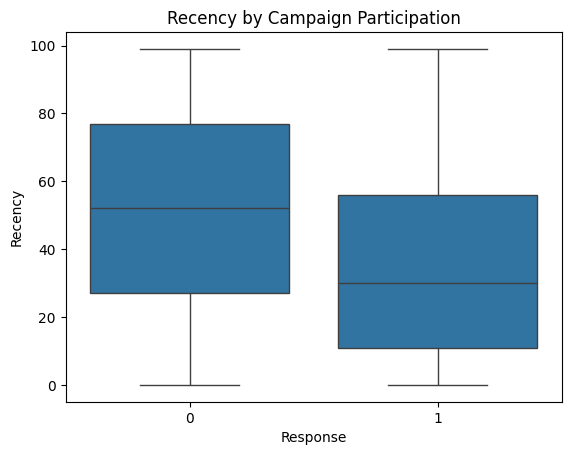

In [329]:
# Campaigns vs Recency
sns.boxplot(x='Response', y='Recency', data=df)
plt.title('Recency by Campaign Participation')
plt.show()

In [332]:
recency_0 = df[df['Response'] == 0]['Recency']
recency_1 = df[df['Response'] == 1]['Recency']
ttest_ind(recency_0, recency_1, equal_var=False)

TtestResult(statistic=np.float64(9.786012401420239), pvalue=np.float64(1.0851343821468196e-20), df=np.float64(465.80529391766504))

Customers who accepted the campaign have significantly higher recency values,

-> They made their last purchase a long time ago (they are less recent customers).

-> Customers who did not accept the campaign are more recent buyers.

['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']


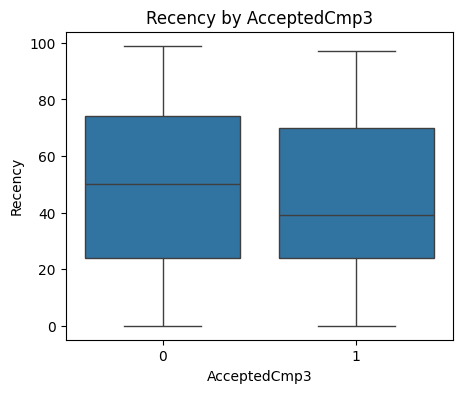

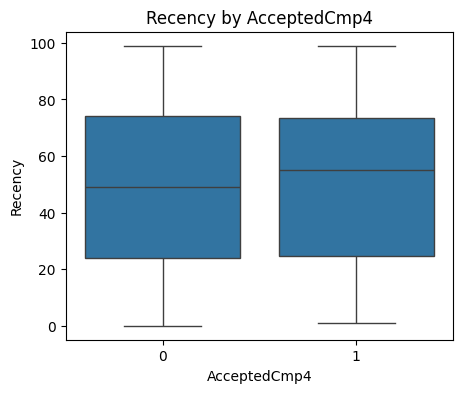

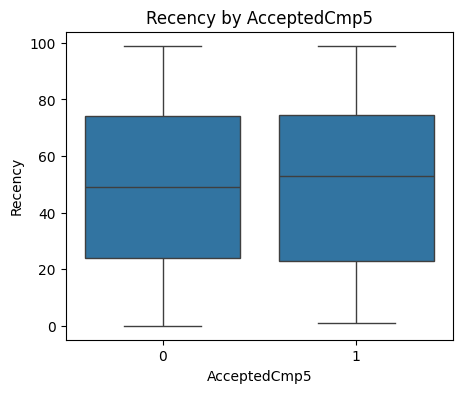

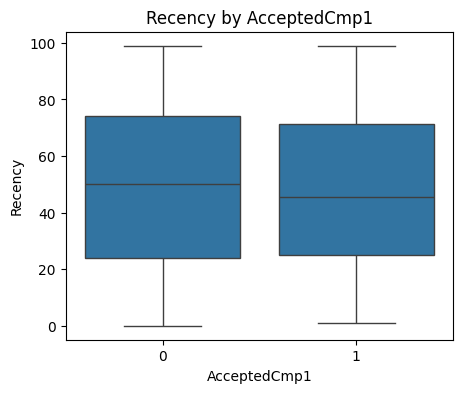

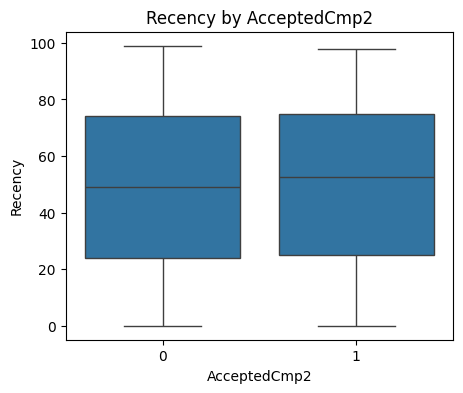

In [337]:
campaign_cols = [col for col in df.columns if 'acceptedcmp' in col.lower()]
print(campaign_cols)
for col in campaign_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=col, y='Recency', data=df)
    plt.title(f"Recency by {col}")
    plt.show()

In [342]:
for col in campaign_cols:
    rec0 = df[df[col] == 0]['Recency']
    rec1 = df[df[col] == 1]['Recency']
    t_stat, p_val = ttest_ind(rec0, rec1, equal_var=False)
    print(f"{col}: t={t_stat:.3f}, p={p_val:.3f}")

AcceptedCmp3: t=1.584, p=0.115
AcceptedCmp4: t=-0.888, p=0.376
AcceptedCmp5: t=-0.006, p=0.995
AcceptedCmp1: t=0.930, p=0.354
AcceptedCmp2: t=0.077, p=0.939


There is no clear evidence that recency (how recent the last purchase was) affects whether a customer accepts any campaign.

In [308]:

le=LabelEncoder()

In [309]:
df['Education']=le.fit_transform(df['Education'])

In [310]:
df['Marital_Status']=le.fit_transform(df['Marital_Status'])

In [311]:
df['Marital_Status'] = df['Marital_Status'].astype('category')


In [312]:
df.head()

Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957          2              2  58138.0        0         0   
1        1954          2              2  46344.0        1         1   
2        1965          2              3  71613.0        0         0   
3        1984          2              3  26646.0        1         0   
4        1981          4              1  58293.0        1         0   

  Dt_Customer  Recency   MntWines  MntFruits  ...  Total_Purchases  \
0  2012-09-04       58  25.199206   4.488636  ...        51.488000   
1  2014-03-08       38   3.316625   0.693147  ...         9.924989   
2  2013-08-21       26  20.639767   3.912023  ...        41.905003   
3  2014-02-10       26   3.316625   1.609438  ...        13.741742   
4  2014-01-19       94  13.152946   3.784190  ...        32.157086   

   Total_original  Total_Num_Purchases  Purchases_Ratio  FamilySize  Year  \
0            1617             6.835760         6.570900           1  2012   
1              27             2.791759         2.617515           3  2014   
2             776             6.324935         5.720871           2  2013   
3              53             3.023651         3.415242           3  2014   
4             422             5.568272         4.895821           3  2014   

   Month  Day  DayOfWeek  Customer_Since_Days  
0      9    4          1                 4794  
1      3    8          5                 4244  
2      8   21          2                 4443  
3      2   10          0                 4270  
4      1   19          6                 4292  

[5 rows x 37 columns]

In [313]:
df.head()

Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957          2              2  58138.0        0         0   
1        1954          2              2  46344.0        1         1   
2        1965          2              3  71613.0        0         0   
3        1984          2              3  26646.0        1         0   
4        1981          4              1  58293.0        1         0   

  Dt_Customer  Recency   MntWines  MntFruits  ...  Total_Purchases  \
0  2012-09-04       58  25.199206   4.488636  ...        51.488000   
1  2014-03-08       38   3.316625   0.693147  ...         9.924989   
2  2013-08-21       26  20.639767   3.912023  ...        41.905003   
3  2014-02-10       26   3.316625   1.609438  ...        13.741742   
4  2014-01-19       94  13.152946   3.784190  ...        32.157086   

   Total_original  Total_Num_Purchases  Purchases_Ratio  FamilySize  Year  \
0            1617             6.835760         6.570900           1  2012   
1              27             2.791759         2.617515           3  2014   
2             776             6.324935         5.720871           2  2013   
3              53             3.023651         3.415242           3  2014   
4             422             5.568272         4.895821           3  2014   

   Month  Day  DayOfWeek  Customer_Since_Days  
0      9    4          1                 4794  
1      3    8          5                 4244  
2      8   21          2                 4443  
3      2   10          0                 4270  
4      1   19          6                 4292  

[5 rows x 37 columns]

In [314]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Purchases',
       'Total_original', 'Total_Num_Purchases', 'Purchases_Ratio',
       'FamilySize', 'Year', 'Month', 'Day', 'DayOfWeek',
       'Customer_Since_Days'],
      dtype='object')

In [315]:
EDA_df=df[['Education','Marital_Status','Income','Recency','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Complain', 'Response','Age','Purchases_Ratio','FamilySize','Customer_Since_Days']]

In [316]:
EDA_df

Education Marital_Status   Income  Recency  AcceptedCmp3  AcceptedCmp4  \
0             2              2  58138.0       58             0             0   
1             2              2  46344.0       38             0             0   
2             2              3  71613.0       26             0             0   
3             2              3  26646.0       26             0             0   
4             4              1  58293.0       94             0             0   
...         ...            ...      ...      ...           ...           ...   
2235          2              1  61223.0       46             0             0   
2236          4              3  64014.0       56             0             0   
2237          2              0  56981.0       91             0             1   
2238          3              3  69245.0        8             0             0   
2239          4              1  52869.0       40             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response   Age  \
0                0             0             0         0         1  68.0   
1                0             0             0         0         0  71.0   
2                0             0             0         0         0  60.0   
3                0             0             0         0         0  41.0   
4                0             0             0         0         0  44.0   
...            ...           ...           ...       ...       ...   ...   
2235             0             0             0         0         0  58.0   
2236             0             1             0         0         0  79.0   
2237             0             0             0         0         0  44.0   
2238             0             0             0         0         0  69.0   
2239             0             0             0         0         1  71.0   

      Purchases_Ratio  FamilySize  Customer_Since_Days  
0            6.570900           1                 4794  
1            2.617515           3                 4244  
2            5.720871           2                 4443  
3            3.415242           3                 4270  
4            4.895821           3                 4292  
...               ...         ...                  ...  
2235         7.407904           3                 4512  
2236         3.881485           5                 4150  
2237         7.664552           1                 4286  
2238         5.574640           3                 4287  
2239         4.006850           4                 4753  

[2240 rows x 15 columns]

In [317]:
EDA_df.dtypes

Education                 int64
Marital_Status         category
Income                  float64
Recency                   int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Response                  int64
Age                     float64
Purchases_Ratio         float64
FamilySize                int64
Customer_Since_Days       int64
dtype: object

In [318]:
EDA_df.corr()

Education  Marital_Status    Income   Recency  \
Education             1.000000        0.004660  0.145193 -0.011728   
Marital_Status        0.004660        1.000000  0.013227  0.017593   
Income                0.145193        0.013227  1.000000  0.005525   
Recency              -0.011728        0.017593  0.005525  1.000000   
AcceptedCmp3          0.005836       -0.023450 -0.015682 -0.032991   
AcceptedCmp4          0.053266        0.013741  0.215781  0.018826   
AcceptedCmp5          0.033346        0.017024  0.394485  0.000129   
AcceptedCmp1         -0.010845       -0.012958  0.323641 -0.019283   
AcceptedCmp2          0.021369        0.018325  0.103492 -0.001781   
Complain             -0.050540       -0.006082 -0.030665  0.013231   
Response              0.090819       -0.010430  0.160063 -0.198437   
Age                   0.178427        0.061151  0.198404  0.020039   
Purchases_Ratio       0.043221        0.023577  0.710763  0.024212   
FamilySize            0.038383        0.030153 -0.282868  0.011164   
Customer_Since_Days  -0.050741        0.006793 -0.024060  0.024522   

                     AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
Education                0.005836      0.053266      0.033346     -0.010845   
Marital_Status          -0.023450      0.013741      0.017024     -0.012958   
Income                  -0.015682      0.215781      0.394485      0.323641   
Recency                 -0.032991      0.018826      0.000129     -0.019283   
AcceptedCmp3             1.000000     -0.079512      0.080316      0.094751   
AcceptedCmp4            -0.079512      1.000000      0.306526      0.251300   
AcceptedCmp5             0.080316      0.306526      1.000000      0.403078   
AcceptedCmp1             0.094751      0.251300      0.403078      1.000000   
AcceptedCmp2             0.072020      0.292210      0.221533      0.175315   
Complain                 0.008415     -0.027611     -0.009419     -0.025499   
Response                 0.254258      0.177019      0.326634      0.293982   
Age                     -0.061784      0.062721     -0.010965      0.007071   
Purchases_Ratio          0.026865      0.238820      0.385128      0.293929   
FamilySize              -0.027121     -0.076344     -0.226395     -0.180799   
Customer_Since_Days     -0.007713      0.018426     -0.005918     -0.039569   

                     AcceptedCmp2  Complain  Response       Age  \
Education                0.021369 -0.050540  0.090819  0.178427   
Marital_Status           0.018325 -0.006082 -0.010430  0.061151   
Income                   0.103492 -0.030665  0.160063  0.198404   
Recency                 -0.001781  0.013231 -0.198437  0.020039   
AcceptedCmp3             0.072020  0.008415  0.254258 -0.061784   
AcceptedCmp4             0.292210 -0.027611  0.177019  0.062721   
AcceptedCmp5             0.221533 -0.009419  0.326634 -0.010965   
AcceptedCmp1             0.175315 -0.025499  0.293982  0.007071   
AcceptedCmp2             1.000000 -0.011334  0.169293  0.007117   
Complain                -0.011334  1.000000 -0.001707  0.018459   
Response                 0.169293 -0.001707  1.000000 -0.020058   
Age                      0.007117  0.018459 -0.020058  1.000000   
Purchases_Ratio          0.119695 -0.045864  0.209189  0.113075   
FamilySize              -0.059638  0.022844 -0.217782  0.075666   
Customer_Since_Days      0.006064  0.033120  0.194481 -0.019615   

                     Purchases_Ratio  FamilySize  Customer_Since_Days  
Education                   0.043221    0.038383            -0.050741  
Marital_Status              0.023577    0.030153             0.006793  
Income                      0.710763   -0.282868            -0.024060  
Recency                     0.024212    0.011164             0.024522  
AcceptedCmp3                0.026865   -0.027121            -0.007713  
AcceptedCmp4                0.238820   -0.076344             0.018426  
AcceptedCmp5                0.385128   -0.226395          

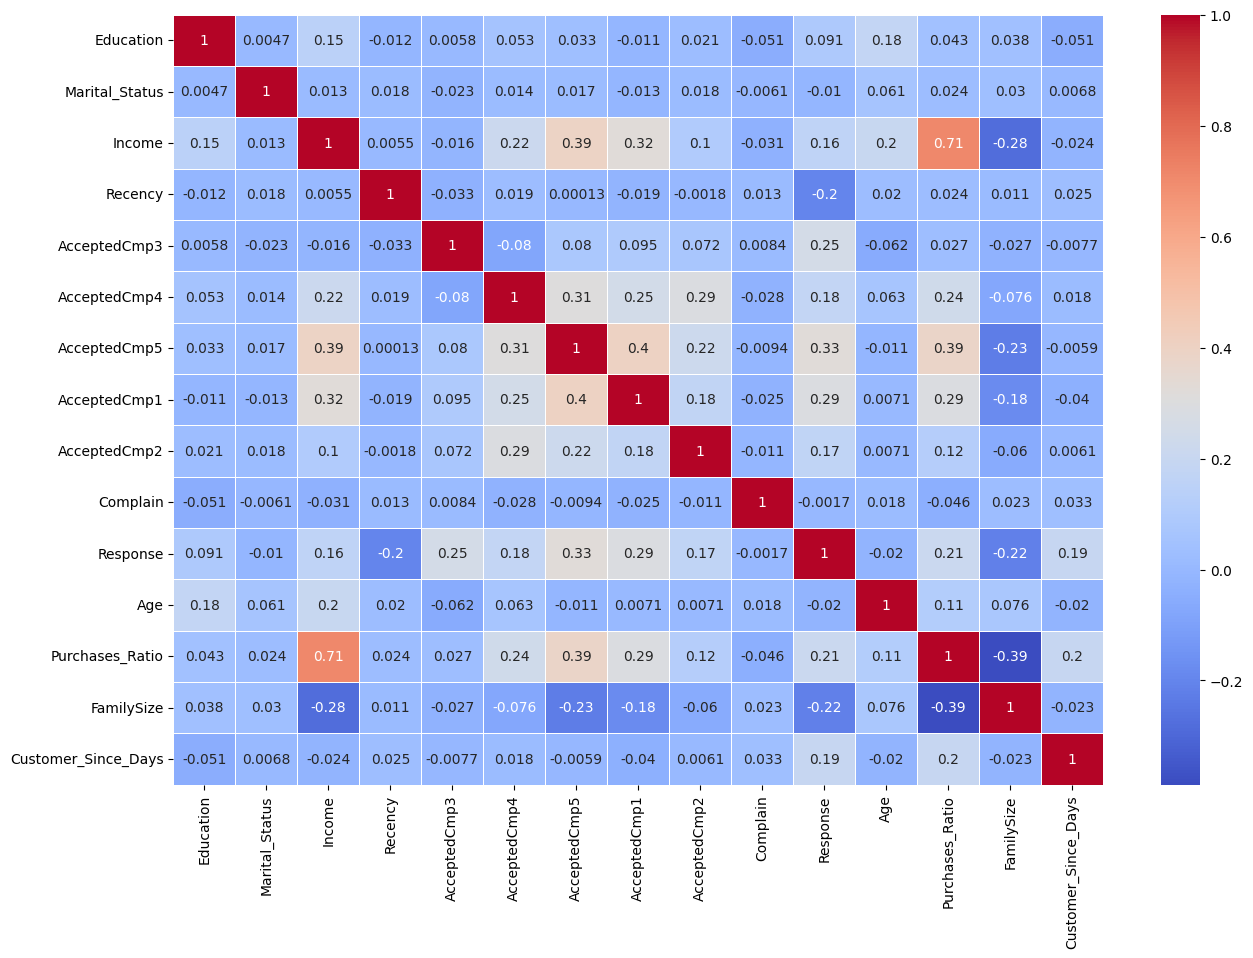

In [319]:
plt.figure(figsize=(15,10))
sns.heatmap(EDA_df.corr(),annot=True,cmap='coolwarm',linewidth=0.5)
plt.show()

In [320]:
r=df['Income'].corr(df['Purchases_Ratio'])

In [321]:
VIF=1/(1-r**2)
VIF

np.float64(2.0209562529002985)

From the above income and the purchase ratio has the 0.7 correlation,But the VIF is 2 which tells us the low multicollinearity .So we can keep both columns.

# Multivariate Analysis

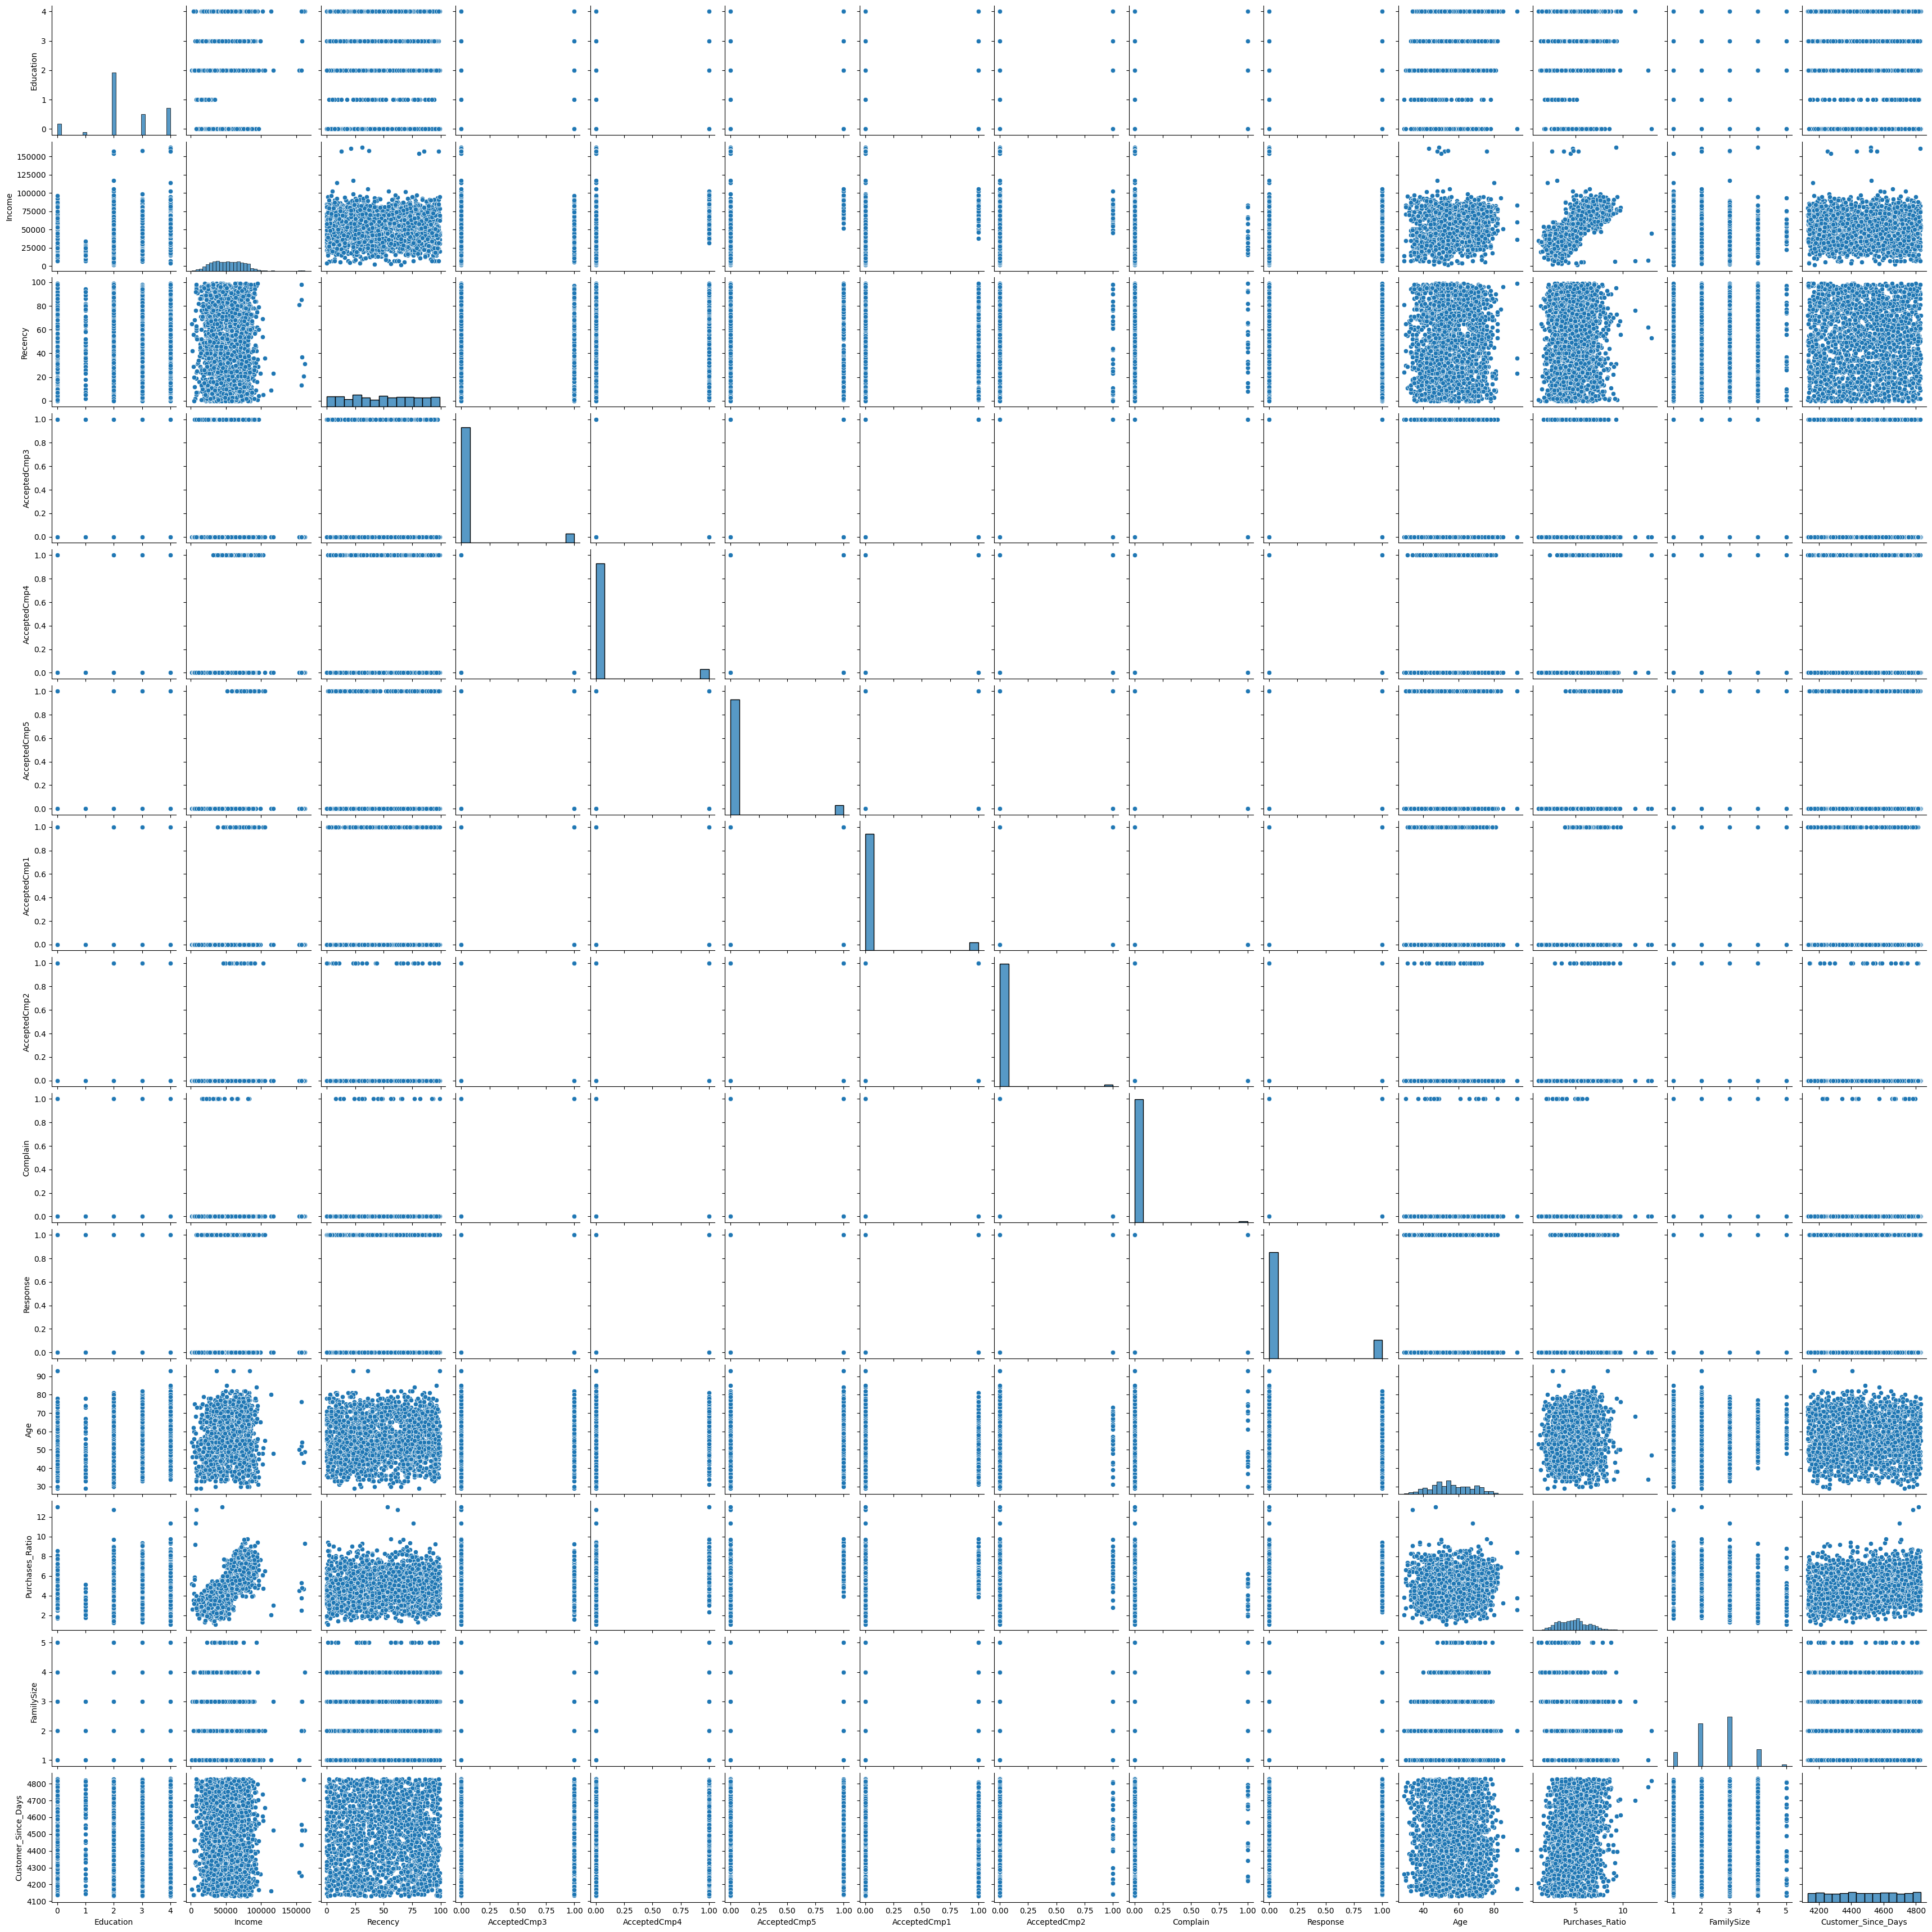

In [322]:
sns.pairplot(EDA_df)

In [323]:
EDA_df.dtypes

Education                 int64
Marital_Status         category
Income                  float64
Recency                   int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Response                  int64
Age                     float64
Purchases_Ratio         float64
FamilySize                int64
Customer_Since_Days       int64
dtype: object